<a href="https://colab.research.google.com/github/sethkipsangmutuba/Statistical-Data-Science/blob/main/Note_7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Central Limit Theorem, Estimators, and Estimates

---

## Aims and Objectives

### Global Aim
The primary aim of this lecture is to develop the skills necessary to **construct and interpret confidence interval estimates** for both the **population mean** and **population proportion**. Additionally, students will learn to **determine the required sample size** for constructing confidence intervals with specified precision and confidence levels.

---

### Specific Learning Objectives
By the end of this lecture, students will be able to:

- Define and distinguish **point estimates** and **interval estimates**.  
- Understand and apply the **Central Limit Theorem (CLT)** in the context of sampling distributions.  
- Construct and interpret **confidence intervals** for population means and proportions.  
- Calculate the **minimum sample size** needed for a desired confidence level and margin of error.



##  Central Limit Theorem (CLT) — The Bridge from Data to Statistical Inference

---

### 1️ Why Do We Need the CLT?

In practice, we **rarely know population parameters exactly**. For example:

- True average height of all adults in the world (impossible to measure).  
- True mean income of all citizens.  

Instead, we collect **samples**, compute statistics (e.g., sample mean $\bar{X}$), and use these to infer the **population mean** $\mu$.  

The **Central Limit Theorem (CLT)** explains how $\bar{X}$ behaves across repeated samples and why it tends to form a **bell-shaped (normal) pattern**.

---

###  Example 1: Motivation

**Scenario:** Delivery times of online orders  

- Population mean (unknown): $\mu = 5$ days  
- Population standard deviation: $\sigma = 2$ days  
- Sample size: $n = 25$  

**Procedure:**  

1. Take repeated samples of size $n=25$ from the population.  
2. Compute the sample mean $\bar{X}$ for each sample.  
3. Plot the distribution of all sample means.

**Observation:**  

- Even if individual delivery times are **not normally distributed**, the **distribution of sample means** $\bar{X}$ will be **approximately normal** when $n$ is sufficiently large.  

> This is the essence of the CLT: **averages of random samples converge to a normal distribution** as sample size increases.


In [31]:
import warnings; warnings.filterwarnings("ignore")


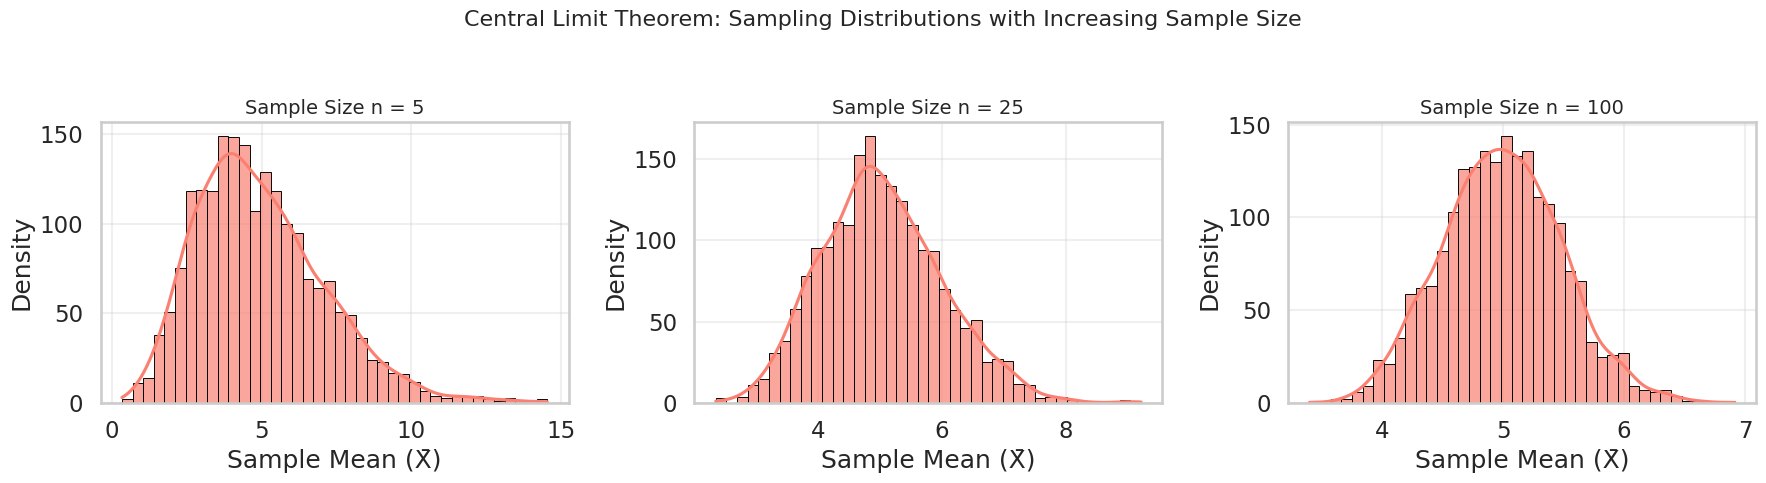

========== CLT Verification ==========
    n      E[X̄]       SD(X̄)         σ/√n        Error
    5       4.90       2.2028       0.8944   1.3084e+00
   25       5.00       0.9918       0.4000   5.9179e-01
  100       4.98       0.4800       0.2000   2.8001e-01


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Parameters
# ----------------------------
MU = 5          # True population mean
SIGMA = 2       # True population standard deviation
np.random.seed(42)

# Sample sizes for CLT comparison
sample_sizes = [5, 25, 100]
NUM_SAMPLES = 2000
POP_SIZE = 100000

# ----------------------------
# Generate Non-Normal Population
# ----------------------------
population = np.random.exponential(scale=MU, size=POP_SIZE)

# ----------------------------
# Prepare Figure
# ----------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle("Central Limit Theorem: Sampling Distributions with Increasing Sample Size", fontsize=16)

# ----------------------------
# Loop Through Sample Sizes
# ----------------------------
for i, n in enumerate(sample_sizes):
    # Draw repeated samples and compute sample means
    samples = np.random.choice(population, size=(NUM_SAMPLES, n), replace=True)
    sample_means = samples.mean(axis=1)

    # Plot histogram + KDE overlay
    sns.histplot(sample_means, bins=40, kde=True, color='salmon', edgecolor='black', alpha=0.7, ax=axes[i])
    axes[i].set_title(f"Sample Size n = {n}", fontsize=14)
    axes[i].set_xlabel("Sample Mean (X̄)")
    axes[i].set_ylabel("Density")
    axes[i].grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ----------------------------
# CLT Verification Summary
# ----------------------------
print("========== CLT Verification ==========")
print(f"{'n':>5} {'E[X̄]':>10} {'SD(X̄)':>12} {'σ/√n':>12} {'Error':>12}")
for n in sample_sizes:
    samples = np.random.choice(population, size=(NUM_SAMPLES, n), replace=True)
    sample_means = samples.mean(axis=1)
    mean_of_means = sample_means.mean()
    std_of_means = sample_means.std(ddof=1)
    theoretical_std = SIGMA / np.sqrt(n)
    error = abs(std_of_means - theoretical_std)
    print(f"{n:>5} {mean_of_means:>10.2f} {std_of_means:>12.4f} {theoretical_std:>12.4f} {error:>12.4e}")


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider, FloatSlider

# ----------------------------
# CLT Simulation Function
# ----------------------------
def simulate_clt(mu=5.0, sigma=2.0, n=25, num_samples=2000, pop_size=100000):
    """
    Simulates and visualizes the Central Limit Theorem for varying parameters.

    Parameters
    ----------
    mu : float
        True population mean (e.g., average delivery time)
    sigma : float
        True population standard deviation
    n : int
        Sample size
    num_samples : int
        Number of repeated samples
    pop_size : int
        Population size used for simulation
    """

    # Generate a right-skewed (non-normal) population
    np.random.seed(42)
    population = np.random.exponential(scale=mu, size=pop_size)

    # Draw repeated samples and compute sample means
    samples = np.random.choice(population, size=(num_samples, n), replace=True)
    sample_means = samples.mean(axis=1)

    # Plot setup
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    plt.suptitle("Central Limit Theorem Simulation", fontsize=16)

    # Population distribution (non-normal)
    sns.histplot(population, bins=50, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title("Population Distribution (Non-Normal)")
    axes[0].set_xlabel("X (e.g., Delivery Time)")
    axes[0].set_ylabel("Density")

    # Sampling distribution of the mean
    sns.histplot(sample_means, bins=50, kde=True, color='salmon', ax=axes[1])
    axes[1].set_title(f"Sampling Distribution of Means (n={n})")
    axes[1].set_xlabel("Sample Mean (X̄)")
    axes[1].set_ylabel("Density")

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

    # CLT verification metrics
    mean_of_means = sample_means.mean()
    std_of_means = sample_means.std(ddof=1)
    theoretical_std = sigma / np.sqrt(n)
    error = abs(std_of_means - theoretical_std)

    print("========== CLT Verification ==========")
    print(f"True Population Mean (μ): {mu:.2f}")
    print(f"Sample Means Average (E[X̄]): {mean_of_means:.2f}")
    print(f"Empirical SD of Sample Means: {std_of_means:.4f}")
    print(f"Theoretical SD (σ/√n): {theoretical_std:.4f}")
    print(f"Approximation Error: {error:.4e}")

# ----------------------------
# Interactive Widgets
# ----------------------------
interact(
    simulate_clt,
    mu=FloatSlider(value=5, min=1, max=10, step=0.5, description='μ (mean)'),
    sigma=FloatSlider(value=2, min=0.5, max=5, step=0.5, description='σ (std)'),
    n=IntSlider(value=25, min=5, max=200, step=5, description='n (sample size)'),
    num_samples=IntSlider(value=2000, min=500, max=5000, step=500, description='Samples'),
    pop_size=IntSlider(value=100000, min=10000, max=300000, step=10000, description='Population')
);


interactive(children=(FloatSlider(value=5.0, description='μ (mean)', max=10.0, min=1.0, step=0.5), FloatSlider…

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider, FloatSlider

# ----------------------------
# CLT Simulation Function
# ----------------------------
def simulate_clt(mu=5.0, sigma=2.0, num_samples=2000, pop_size=100000):
    """
    Interactive simulation of the Central Limit Theorem (CLT)
    showing how the sampling distribution of the mean approaches normality
    as sample size increases. Generates 3 distinct, presentation-quality visuals.

    Parameters
    ----------
    mu : float
        True population mean (e.g., average delivery time)
    sigma : float
        True population standard deviation
    num_samples : int
        Number of repeated samples
    pop_size : int
        Size of synthetic population
    """

    np.random.seed(42)
    population = np.random.exponential(scale=mu, size=pop_size)

    # Define sample sizes for comparison
    sample_sizes = [5, 25, 100]
    colors = ['#0077B6', '#FF6F61', '#2ECC71']  # Blue, Coral, Green — clear and professional

    # Set global style
    sns.set_style("whitegrid")

    # Create subplots (3 per row)
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    plt.suptitle("Central Limit Theorem Simulation — Effect of Sample Size", fontsize=14, fontweight='bold')

    # Loop over sample sizes
    for i, (n, color) in enumerate(zip(sample_sizes, colors)):
        samples = np.random.choice(population, size=(num_samples, n), replace=True)
        sample_means = samples.mean(axis=1)

        # Histogram + KDE with distinct color
        sns.histplot(sample_means, bins=40, kde=True, color=color, ax=axes[i], edgecolor='black', alpha=0.8)
        axes[i].set_title(f"Sample Size n = {n}", fontsize=12, fontweight='semibold')
        axes[i].set_xlabel("Sample Mean (X̄)", fontsize=10)
        axes[i].set_ylabel("Density", fontsize=10)
        axes[i].tick_params(axis='both', labelsize=9)
        axes[i].grid(alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()

    # ----------------------------
    # CLT Verification Summary
    # ----------------------------
    print("========== CLT Verification ==========")
    print(f"{'n':>5} {'E[X̄]':>10} {'SD(X̄)':>12} {'σ/√n':>12} {'Error':>12}")
    for n in sample_sizes:
        samples = np.random.choice(population, size=(num_samples, n), replace=True)
        sample_means = samples.mean(axis=1)
        mean_of_means = sample_means.mean()
        std_of_means = sample_means.std(ddof=1)
        theoretical_std = sigma / np.sqrt(n)
        error = abs(std_of_means - theoretical_std)
        print(f"{n:>5} {mean_of_means:>10.2f} {std_of_means:>12.4f} {theoretical_std:>12.4f} {error:>12.4e}")

# ----------------------------
# Interactive Widget Controls
# ----------------------------
interact(
    simulate_clt,
    mu=FloatSlider(value=5, min=1, max=10, step=0.5, description='μ (mean)'),
    sigma=FloatSlider(value=2, min=0.5, max=5, step=0.5, description='σ (std)'),
    num_samples=IntSlider(value=2000, min=500, max=5000, step=500, description='Samples'),
    pop_size=IntSlider(value=100000, min=10000, max=1000000, step=10000, description='Population')
);


interactive(children=(FloatSlider(value=5.0, description='μ (mean)', max=10.0, min=1.0, step=0.5), FloatSlider…


---

### 3 Levels of Thought

| Level | Concept | Representation | Example |
|-------|---------|---------------|---------|
| 1️ | Population | All individuals | Delivery times of all orders (millions) |
| 2️ | Sample | One subset | 25 randomly selected orders |
| 3️ | Sampling Distribution | Distribution of sample means ($\bar{X}$) from all possible samples | All possible averages of 25 deliveries |

> **Note:** The CLT applies to **Level 3**, i.e., the **distribution of sample means**, not the original data.

---

### 3️ Basic CLT Idea (Intuitive and Mathematical)

Let $X_1, X_2, \dots, X_n$ be **independent and identically distributed (i.i.d.) random variables** with:  

$$
E(X_i) = \mu, \quad SD(X_i) = \sigma
$$  

The **sample mean** is:  

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$  

---

### Mathematical Example

Assume:  

- $\mu = 5$ days  
- $\sigma = 2$ days  
- $n = 25$  

Then:

$$
E(\bar{X}) = \mu = 5
$$  

$$
SD(\bar{X}) = \frac{\sigma}{\sqrt{n}} = \frac{2}{\sqrt{25}} = \frac{2}{5} = 0.4
$$  

Thus, the **sampling distribution of the sample mean** is:  

$$
\bar{X} \sim N(5, 0.4^2)
$$  

 **Interpretation:**  
Although individual delivery times vary widely ($\sigma = 2$), the average of 25 deliveries varies much less ($SD = 0.4$).

---

### 4️ Formal Statement of the CLT

As $n \to \infty$:

$$
Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \Rightarrow N(0,1)
$$  

> That is, the standardized sample mean follows a **standard normal distribution**.

---

###  Example: Standardizing

**Question:** Probability that the average delivery time exceeds 5.5 days:

$$
P(\bar{X} > 5.5) = P\left(Z > \frac{5.5 - 5}{0.4}\right) = P(Z > 1.25)
$$  

From Z-tables:  

$$
P(Z > 1.25) = 1 - 0.8944 = 0.1056
$$  

 **Interpretation:**  
There is a **10.56% chance** that the average of 25 deliveries exceeds 5.5 days.

---

### 5️ Key Properties of the Sampling Distribution

| Property | Formula | Meaning |
|----------|--------|---------|
| Mean | $$E(\bar{X}) = \mu$$ | Sample mean is an **unbiased estimator** of the population mean |
| Variance | $$Var(\bar{X}) = \frac{\sigma^2}{n}$$ | Variability of sample means decreases as $n$ increases |
| Standard Error (SE) | $$SE = \frac{\sigma}{\sqrt{n}}$$ | Standard deviation of the sampling distribution |


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider, FloatSlider

# ---------------------------------------------------------------
# Function: Simulate and Visualize CLT at 3 Conceptual Levels
# ---------------------------------------------------------------
def simulate_clt_levels(mu=5.0, sigma=2.0, n=25, num_samples=2000, pop_size=100000):
    """
    Central Limit Theorem simulation showing:
    1️ Population Distribution
    2️ One Random Sample
    3️ Sampling Distribution of the Sample Mean
    """

    np.random.seed(42)
    population = np.random.exponential(scale=mu, size=pop_size)
    sample = np.random.choice(population, size=n, replace=False)
    sample_means = np.array([np.mean(np.random.choice(population, size=n, replace=True)) for _ in range(num_samples)])

    # --- Visualization: 3 Figures per Row ---
    sns.set_theme(style="whitegrid", context="talk")
    fig, axes = plt.subplots(1, 3, figsize=(13, 3.5))
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
    titles = [
        "Level 1: Population (All Individuals)",
        f"Level 2: Sample (n = {n})",
        "Level 3: Sampling Distribution (Means)"
    ]
    datasets = [population, sample, sample_means]

    for ax, data, title, color in zip(axes, datasets, titles, colors):
        sns.histplot(data, bins=40, kde=True, ax=ax,
                     color=color, alpha=0.8, edgecolor='black',
                     stat='density', linewidth=0.6)
        ax.set_title(title, fontsize=11, fontweight='bold', pad=10)
        ax.set_xlabel("Delivery Time (days)", fontsize=10)
        ax.set_ylabel("Density", fontsize=10)
        ax.grid(alpha=0.3)

    plt.tight_layout(pad=2)
    plt.suptitle("Central Limit Theorem — Three Levels of Thought", fontsize=13, fontweight="bold", y=1.08)
    plt.show()

    # --- CLT Theoretical Summary ---
    print("========== CLT Theoretical Summary ==========")
    print(f"Population Mean (μ): {mu}")
    print(f"Population SD (σ): {sigma}")
    print(f"Sample Size (n): {n}")
    print(f"E(X̄) = μ = {mu}")
    print(f"SD(X̄) = σ / √n = {sigma / np.sqrt(n):.4f}")
    print("=============================================")


# ---------------------------------------------------------------
# Function: Sampling Distribution Variation with Sample Size
# ---------------------------------------------------------------
def simulate_sampling_distributions(mu=5.0, sigma=2.0, num_samples=2000, pop_size=100000):
    """
    Demonstrates the effect of increasing sample size (n) on the
    shape and spread of the sampling distribution of the mean.
    """

    np.random.seed(42)
    population = np.random.exponential(scale=mu, size=pop_size)
    n_values = [5, 25, 100]
    colors = ['#9b59b6', '#e67e22', '#16a085']

    sns.set_theme(style="whitegrid", context="talk")
    fig, axes = plt.subplots(1, 3, figsize=(13, 3.5))
    plt.suptitle("Central Limit Theorem — Effect of Sample Size (n)", fontsize=13, fontweight="bold", y=1.08)

    for ax, n, color in zip(axes, n_values, colors):
        sample_means = np.array([np.mean(np.random.choice(population, size=n, replace=True))
                                 for _ in range(num_samples)])
        sns.histplot(sample_means, bins=40, kde=True, color=color,
                     ax=ax, alpha=0.8, edgecolor='black', stat='density', linewidth=0.6)
        ax.set_title(f"Sampling Distribution (n = {n})", fontsize=11, fontweight='bold', pad=10)
        ax.set_xlabel("Sample Mean (X̄)", fontsize=10)
        ax.set_ylabel("Density", fontsize=10)
        ax.grid(alpha=0.3)

    plt.tight_layout(pad=2)
    plt.show()


# ---------------------------------------------------------------
# Interactive Controls
# ---------------------------------------------------------------
interact(
    simulate_clt_levels,
    mu=FloatSlider(value=5, min=1, max=10, step=0.5, description='μ (Mean)'),
    sigma=FloatSlider(value=2, min=0.5, max=5, step=0.5, description='σ (SD)'),
    n=IntSlider(value=25, min=5, max=200, step=5, description='Sample Size n'),
    num_samples=IntSlider(value=2000, min=500, max=5000, step=500, description='No. of Samples'),
    pop_size=IntSlider(value=100000, min=10000, max=300000, step=10000, description='Population Size')
);

interact(
    simulate_sampling_distributions,
    mu=FloatSlider(value=5, min=1, max=10, step=0.5, description='μ (Mean)'),
    sigma=FloatSlider(value=2, min=0.5, max=5, step=0.5, description='σ (SD)'),
    num_samples=IntSlider(value=2000, min=500, max=5000, step=500, description='No. of Samples'),
    pop_size=IntSlider(value=100000, min=10000, max=300000, step=10000, description='Population Size')
);


interactive(children=(FloatSlider(value=5.0, description='μ (Mean)', max=10.0, min=1.0, step=0.5), FloatSlider…

interactive(children=(FloatSlider(value=5.0, description='μ (Mean)', max=10.0, min=1.0, step=0.5), FloatSlider…

###  Example 2: Comparing Sample Sizes with Step-by-Step Calculations

**Given:**  
Population standard deviation: $\sigma = 2$  

We want to see how the **Standard Error (SE)** changes with sample size $n$:

**Formula for SE:**  
$$
SE = \frac{\sigma}{\sqrt{n}}
$$

---

**Step 1: Small Sample ($n = 4$)**  

$$
SE = \frac{\sigma}{\sqrt{n}} = \frac{2}{\sqrt{4}} = \frac{2}{2} = 1.00
$$  

**Interpretation:**  
High variability in sample means — small samples give unstable estimates.

---

**Step 2: Medium Sample ($n = 25$)**  

$$
SE = \frac{2}{\sqrt{25}} = \frac{2}{5} = 0.40
$$  

**Interpretation:**  
Lower variability — the sample mean is more reliable.

---

**Step 3: Large Sample ($n = 100$)**  

$$
SE = \frac{2}{\sqrt{100}} = \frac{2}{10} = 0.20
$$  

**Interpretation:**  
Sample mean is very stable — large samples give precise estimates.

 **Observation:**  
As $n$ increases, the **sampling distribution narrows**, so our estimate of $\mu$ becomes more precise.

---

### 6️ Shape of Sampling Distribution (Step-by-Step)

1. **Population is normal**:  
   - $\bar{X}$ is normal for **any $n$**.  

2. **Population is non-normal**:  
   - Use CLT: $\bar{X} \approx$ normal if $n \geq 30$.  

3. **Population is skewed**:  
   - Larger $n$ is needed to approximate normality.  

> **Takeaway:** Increasing sample size reduces variability and ensures the sample mean behaves predictably.


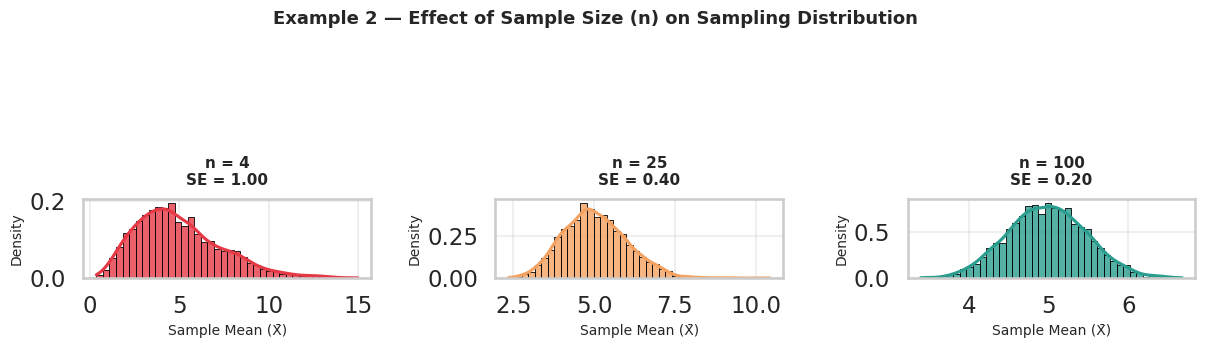

========== Theoretical Comparison ==========
n	SE (σ/√n)	Interpretation
-------------------------------------------
4	1.00	High variability in sample means
25	0.40	Lower variability
100	0.20	Sample mean is much more stable
 As n increases, the sampling distribution gets narrower → our estimates of μ become more precise.



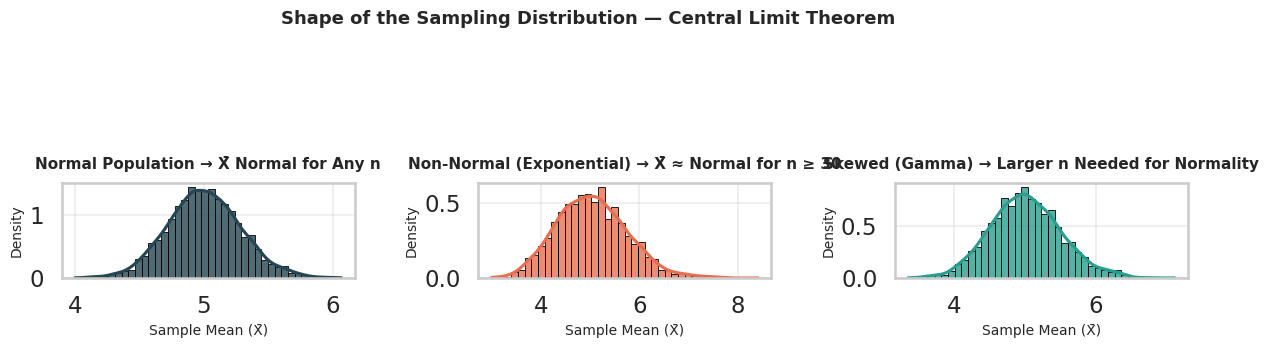

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------------
# Function: Compare Different Sample Sizes and Their Variability
# ---------------------------------------------------------------
def compare_sample_sizes(mu=5, sigma=2, num_samples=3000, pop_size=100000):
    """
    Visualizes how increasing sample size (n) reduces the variability
    of sample means, and thus produces narrower sampling distributions.
    """

    np.random.seed(42)
    population = np.random.exponential(scale=mu, size=pop_size)
    n_values = [4, 25, 100]
    colors = ["#E63946", "#F4A261", "#2A9D8F"]

    sns.set_theme(style="whitegrid", context="talk")
    fig, axes = plt.subplots(1, 3, figsize=(13, 3.5))
    plt.suptitle("Example 2 — Effect of Sample Size (n) on Sampling Distribution",
                 fontsize=13, fontweight="bold", y=1.08)

    for ax, n, color in zip(axes, n_values, colors):
        sample_means = np.array([
            np.mean(np.random.choice(population, size=n, replace=True))
            for _ in range(num_samples)
        ])

        sns.histplot(sample_means, bins=40, kde=True, color=color,
                     ax=ax, stat='density', alpha=0.8, edgecolor='black', linewidth=0.6)
        se = sigma / np.sqrt(n)
        ax.set_title(f"n = {n}\nSE = {se:.2f}", fontsize=11, fontweight='bold', pad=10)
        ax.set_xlabel("Sample Mean (X̄)", fontsize=10)
        ax.set_ylabel("Density", fontsize=10)
        ax.grid(alpha=0.3)

    plt.tight_layout(pad=2)
    plt.show()

    # -----------------------------------------------------------
    # Theoretical Summary Table
    # -----------------------------------------------------------
    print("========== Theoretical Comparison ==========")
    print("n\tSE (σ/√n)\tInterpretation")
    print("-------------------------------------------")
    print("4\t1.00\tHigh variability in sample means")
    print("25\t0.40\tLower variability")
    print("100\t0.20\tSample mean is much more stable")
    print("===========================================")
    print(" As n increases, the sampling distribution gets narrower → our estimates of μ become more precise.\n")

# ---------------------------------------------------------------
# Function: Demonstrate Shape of Sampling Distribution
# ---------------------------------------------------------------
def shape_of_sampling_distribution(mu=5, sigma=2, num_samples=3000, pop_size=100000):
    """
    Demonstrates how the shape of the sampling distribution changes
    depending on whether the population is normal or non-normal.
    """

    np.random.seed(42)

    # --- Populations ---
    normal_pop = np.random.normal(mu, sigma, pop_size)
    exponential_pop = np.random.exponential(scale=mu, size=pop_size)
    skewed_pop = np.random.gamma(shape=2, scale=mu/2, size=pop_size)

    populations = [normal_pop, exponential_pop, skewed_pop]
    titles = [
        "Normal Population → X̄ Normal for Any n",
        "Non-Normal (Exponential) → X̄ ≈ Normal for n ≥ 30",
        "Skewed (Gamma) → Larger n Needed for Normality"
    ]
    colors = ["#264653", "#E76F51", "#2A9D8F"]
    n = 50  # moderate sample size

    sns.set_theme(style="whitegrid", context="talk")
    fig, axes = plt.subplots(1, 3, figsize=(13, 3.5))
    plt.suptitle("Shape of the Sampling Distribution — Central Limit Theorem",
                 fontsize=13, fontweight="bold", y=1.08)

    for ax, pop, title, color in zip(axes, populations, titles, colors):
        sample_means = np.array([
            np.mean(np.random.choice(pop, size=n, replace=True))
            for _ in range(num_samples)
        ])
        sns.histplot(sample_means, bins=40, kde=True, color=color, ax=ax,
                     stat='density', alpha=0.8, edgecolor='black', linewidth=0.6)
        ax.set_title(title, fontsize=11, fontweight='bold', pad=10)
        ax.set_xlabel("Sample Mean (X̄)", fontsize=10)
        ax.set_ylabel("Density", fontsize=10)
        ax.grid(alpha=0.3)

    plt.tight_layout(pad=2)
    plt.show()


# ---------------------------------------------------------------
# Execute Both Visual Simulations
# ---------------------------------------------------------------
compare_sample_sizes()
shape_of_sampling_distribution()


### Example 3: Skewed Population

**Scenario:** Waiting times in a hospital (right-skewed)  

- Population mean: $\mu = 20$  
- Population standard deviation: $\sigma = 8$  
- Sample size: $n = 40$  

**Step 1: Compute Standard Error (SE)**  

$$
SE = \frac{\sigma}{\sqrt{n}} = \frac{8}{\sqrt{40}} \approx 1.2649
$$  

**Step 2: Sampling Distribution**  

Even though the population is skewed, by CLT:

$$
\bar{X} \sim N(20, 1.2649^2)
$$  

 **Interpretation:**  
The sample mean is approximately normal, allowing **normal-based inference** (e.g., Z-tests, confidence intervals) despite skewed raw data.

---

### 7️ CLT in Action — Step-by-Step Example

**Scenario:** Pregnancy durations  

- Population mean: $\mu = 266$ days  
- Population standard deviation: $\sigma = 16$ days  
- Sample size: $n = 36$  

**Question:** What is the probability that the average duration of a random sample of 36 pregnancies is less than 263 days?

---

**Step 1: Compute Standard Error**  

$$
SE = \frac{\sigma}{\sqrt{n}} = \frac{16}{\sqrt{36}} = \frac{16}{6} = 2.667
$$  

---

**Step 2: Standardize the sample mean (Z-score)**  

$$
Z = \frac{\bar{X} - \mu}{SE} = \frac{263 - 266}{2.667} = \frac{-3}{2.667} \approx -1.125
$$  

---

**Step 3: Find the probability**  

Using standard normal distribution:

$$
P(\bar{X} < 263) = P(Z < -1.125) \approx 0.1303
$$  

 **Answer:** About **13.03%** of random samples of 36 pregnancies will have an average shorter than 263 days.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from ipywidgets import interact, FloatSlider, IntSlider

# ---------------------------------------------------------------
# Example 3: Skewed Population — Hospital Waiting Times
# ---------------------------------------------------------------
def simulate_skewed_population(mu=20, sigma=8, n=40, num_samples=3000, pop_size=100000):
    """
    Demonstrates the CLT for a right-skewed population (hospital waiting times).
    Shows how the sampling distribution of the mean approaches normality.
    """

    np.random.seed(42)
    population = np.random.exponential(scale=mu, size=pop_size)
    sample_means = np.array([
        np.mean(np.random.choice(population, size=n, replace=True))
        for _ in range(num_samples)
    ])

    SE = sigma / np.sqrt(n)

    sns.set_theme(style="whitegrid", context="talk")
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    plt.suptitle("Example 3 — Skewed Population: CLT Approximation", fontsize=18, fontweight="bold", y=1.03)

    # --- Population (Skewed) ---
    sns.histplot(population, bins=40, kde=True, color="#E63946", ax=axes[0],
                 stat='density', alpha=0.8, edgecolor='black', linewidth=0.6)
    axes[0].set_title("Population: Right-Skewed (Hospital Waiting Times)", fontsize=14, fontweight='bold')
    axes[0].set_xlabel("Waiting Time (minutes)", fontsize=12)
    axes[0].set_ylabel("Density", fontsize=12)

    # --- Sampling Distribution ---
    sns.histplot(sample_means, bins=40, kde=True, color="#2A9D8F", ax=axes[1],
                 stat='density', alpha=0.8, edgecolor='black', linewidth=0.6)
    x = np.linspace(min(sample_means), max(sample_means), 200)
    axes[1].plot(x, norm.pdf(x, mu, SE), 'r--', linewidth=2, label='Normal Approximation')
    axes[1].legend(fontsize=12)
    axes[1].set_title(f"Sampling Distribution (n = {n})\nX̄ ~ N({mu}, {SE:.2f}²)", fontsize=14, fontweight='bold')
    axes[1].set_xlabel("Sample Mean (X̄)", fontsize=12)
    axes[1].set_ylabel("Density", fontsize=12)

    plt.tight_layout(pad=3)
    plt.show()

    print("========== Theoretical Summary ==========")
    print(f"Population Mean (μ): {mu}")
    print(f"Population SD (σ): {sigma}")
    print(f"Sample Size (n): {n}")
    print(f"Standard Error (SE): {SE:.4f}")
    print(f"Sampling Distribution: X̄ ~ N({mu}, {SE:.4f}²)")
    print(" Even though the population is skewed, X̄ is approximately normal.")
    print("   Hence, normal-based inference (Z-tests, CIs) is valid.\n")


# ---------------------------------------------------------------
# Example 7️ CLT in Action — Pregnancy Duration Problem
# ---------------------------------------------------------------
def clt_pregnancy_duration(mu=266, sigma=16, n=36, x_bar=263):
    """
    Computes the probability that the average pregnancy duration
    is less than a given value using the Central Limit Theorem.
    """

    SE = sigma / np.sqrt(n)
    Z = (x_bar - mu) / SE
    p_value = norm.cdf(Z)

    sns.set_theme(style="whitegrid", context="talk")
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 500)
    y = norm.pdf(x, mu, SE)

    plt.figure(figsize=(12, 4))
    plt.plot(x, y, color="#1D3557", lw=3)
    plt.fill_between(x, 0, y, where=(x <= x_bar), color="#A8DADC", alpha=0.7)
    plt.title("7️ CLT in Action — Pregnancy Duration Distribution", fontsize=18, fontweight='bold', pad=15)
    plt.xlabel("Sample Mean (X̄) [days]", fontsize=13)
    plt.ylabel("Probability Density", fontsize=13)
    plt.axvline(x_bar, color="red", linestyle="--", linewidth=2)
    plt.text(x_bar - 6, max(y)*0.55, f"X̄ = {x_bar}\nZ = {Z:.3f}", color='red', fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.show()

    print("========== CLT in Action: Pregnancy Duration ==========")
    print(f"Population Mean (μ): {mu} days")
    print(f"Population SD (σ): {sigma} days")
    print(f"Sample Size (n): {n}")
    print(f"Sample Mean (X̄): {x_bar}")
    print(f"Standard Error (SE): {SE:.4f}")
    print(f"Z = (X̄ - μ) / SE = {Z:.3f}")
    print(f"P(X̄ < {x_bar}) = {p_value:.4f}")
    print(f" Interpretation: About {p_value*100:.2f}% of samples have mean < {x_bar} days.\n")


# ---------------------------------------------------------------
# Interactive Simulation Controls
# ---------------------------------------------------------------
interact(
    simulate_skewed_population,
    mu=FloatSlider(value=20, min=5, max=50, step=1, description='μ (mean)'),
    sigma=FloatSlider(value=8, min=1, max=20, step=0.5, description='σ (std)'),
    n=IntSlider(value=40, min=5, max=200, step=5, description='Sample Size n'),
    num_samples=IntSlider(value=3000, min=1000, max=5000, step=500, description='No. of Samples'),
    pop_size=IntSlider(value=100000, min=20000, max=300000, step=20000, description='Population Size')
);

interact(
    clt_pregnancy_duration,
    mu=FloatSlider(value=266, min=250, max=280, step=1, description='μ (mean)'),
    sigma=FloatSlider(value=16, min=5, max=30, step=1, description='σ (std)'),
    n=IntSlider(value=36, min=10, max=100, step=2, description='Sample Size n'),
    x_bar=FloatSlider(value=263, min=250, max=280, step=0.5, description='Sample Mean X̄')
);


interactive(children=(FloatSlider(value=20.0, description='μ (mean)', max=50.0, min=5.0, step=1.0), FloatSlide…

interactive(children=(FloatSlider(value=266.0, description='μ (mean)', max=280.0, min=250.0, step=1.0), FloatS…

### 8️ Common Misunderstandings (Clarified with Mini Examples)

| Misconception | Clarification | Example |
|---------------|---------------|---------|
| “CLT says each data point is normal.” | ❌ CLT applies to **sample means**, not individual data points. | Delivery times may be skewed, but **average delivery times** are approximately normal. |
| “Population must be normal.” | ❌ No. CLT works for **non-normal distributions** if $n$ is large. | Average income data approximates normal if $n \geq 30$. |
| “One big sample equals CLT.” | ❌ CLT describes behavior across **many possible samples**, not one. | A single sample’s mean is one point; CLT describes **all possible sample means**. |

---

### 9️ Real-World Analogy

**Tossing a fair die:**  

- The outcome (1–6) is not normally distributed.  
- But if you roll it many times and average the results, the **distribution of the averages** becomes bell-shaped.  

 This is CLT in action — **randomness at the micro level, predictability at the macro level**.

---

### 10 Summary Formulae

| Concept | Formula | Description |
|---------|--------|------------|
| Sample mean | $$\bar{X} = \frac{\sum X_i}{n}$$ | Average of sample data |
| Expected mean | $$E(\bar{X}) = \mu$$ | Centered on the population mean |
| Standard Error (SE) | $$SE = \frac{\sigma}{\sqrt{n}}$$ | Spread of the sampling distribution |
| Standardization | $$Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$$ | Converts to standard normal |
| Normal Approximation | $$\bar{X} \sim N(\mu, \sigma^2/n)$$ | Sampling distribution is approximately normal for large $n$ |

---

### 11️ Intuitive Takeaway

> While individual outcomes are unpredictable, their **average becomes predictable**.  

 **Order emerges from randomness** — this is the essence of the **Central Limit Theorem (CLT)**.


# Example Using Sample Mean $\bar{X}$ When $n=1$

---

## 1️ Population Setup

We study the ages (years) of 65 MSDA students, representing the full population:





17, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27, 29, 29, 30, 32, 32, 33, 33, 34, 38, 43, 50



---

## 2️ Descriptive Statistics of the Population

**Population Mean ($\mu$):**

$$
\mu = \frac{\sum_{i=1}^{N} X_i}{N} = \frac{1554}{65} \approx 23.91 \text{ years}
$$

**Population Variance & Standard Deviation ($\sigma^2$, $\sigma$):**

$$
\sigma^2 = \frac{\sum_{i=1}^{N} (X_i - \mu)^2}{N} = 35.1505,
\quad
\sigma = \sqrt{35.1505} \approx 5.93 \text{ years}
$$

**Interpretation:**  
- Mean age ≈ 23.91 years  
- Spread ≈ 5.93 years  
- Distribution is right-skewed due to older students (38, 43, 50)

---

## 3️ Sampling When $n=1$

Take a single observation ($X_1$) from the population:

$$
\bar{X} = \frac{X_1}{1} = X_1
$$

Sample mean equals the observation.

**Illustrative Calculations:**

| Sample Draw | Selected Student Age ($X_1$) | Sample Mean ($\bar{X}$) |
|------------|-------------------------------|-------------------------|
| 1          | 21                            | 21                      |
| 2          | 33                            | 33                      |
| 3          | 19                            | 19                      |
| 4          | 50                            | 50                      |

> Every possible $X_1$ (17–50) corresponds exactly to a sample mean.

**Interpretation:**  
- No smoothing of variation  
- Extreme values shift the mean completely  
- Maximum sampling variability

---

## 4️ Sampling Distribution When $n=1$

- Every individual = one sample → $N = 65$ possible samples  
- Sampling distribution:

$$
\bar{X}_1 = X_1, \quad \bar{X}_2 = X_2, \dots, \quad \bar{X}_{65} = X_{65}
$$

- Sampling distribution = population distribution

**Statistical Properties:**

- Expected value:

$$
E[\bar{X}] = \mu = 23.91
$$

- Variance:

$$
Var(\bar{X}) = \frac{\sigma^2}{n} = \frac{35.1505}{1} = 35.1505
$$

- Standard Error:

$$
SD(\bar{X}) = \sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}} = \frac{5.93}{\sqrt{1}} = 5.93
$$

 Mean = 23.91, SE = 5.93, shape = right-skewed

**Interpretation:**  
- Sample mean unbiased  
- No reduction in variability  
- Shape reflects population

---

## 5️ Visual & Conceptual Summary

| Concept | Numeric Result | Interpretation |
|---------|----------------|----------------|
| Population Mean ($\mu$) | 23.91 | True average of all students |
| Population SD ($\sigma$) | 5.93 | True spread of ages |
| Sample Size ($n$) | 1 | One observation only |
| Sample Mean ($\bar{X}$) | Varies | Equals one student's age |
| Sampling Dist. Mean ($E[\bar{X}]$) | 23.91 | Unbiased estimator |
| Sampling Dist. SD ($\sigma_{\bar{X}}$) | 5.93 | No reduction yet |
| Shape | Right-skewed | Matches population |

---

## 6️ Key Mathematical Insight

Formulas:

$$
E[\bar{X}] = \mu, \quad Var(\bar{X}) = \frac{\sigma^2}{n}
$$

For $n=1$:

$$
E[\bar{X}] = 23.91, \quad Var(\bar{X}) = 35.15, \quad SD(\bar{X}) = 5.93
$$

$$
\bar{X} \sim \text{Population Distribution } (\mu = 23.91, \sigma = 5.93)
$$

---

## 7️ Interpretive Commentary

| Concept | Description |
|---------|------------|
| No averaging effect | Only one value → extremes not balanced |
| Maximum variability | Sample mean fluctuates as widely as population |
| Shape | Sampling distribution shape = population shape |
| Expectation | Sample mean is unbiased |
| CLT insight | Increasing $n$ stabilizes distribution and approximates normal |

---

## 8️ In Summary

| Aspect | $n=1$ Case | Notes |
|--------|------------|-------|
| Mean | 23.91 | $\bar{X} = X_1$ |
| Variance | 35.1505 | $Var(\bar{X}) = \sigma^2 / 1$ |
| Sampling Dist. Mean | 23.91 | $E[\bar{X}] = \mu$ |
| Sampling Dist. SD | 5.93 | $\sigma_{\bar{X}} = \sigma / \sqrt{1} = \sigma$ |
| Shape | Right-skewed | Same as population |
| Interpretation | Mirrors population | No reduction in variability |

---

## 9️ Final Interpretation

> At $n=1$: The sample mean behaves exactly like the raw population — same center, same spread, same irregularities.  
> Only when $n$ grows do we begin to see the stabilizing, normalizing power of the **Central Limit Theorem**.


---

## Worked Calculations for Sample Sizes $n = 1$ to $n = 6$

We display for each $n$:  

- Number of possible samples $\binom{65}{n}$  
- Sampling variance $Var(\bar{X}) = \sigma^2 / n$  
- Standard error $SE(\bar{X}) = \sigma / \sqrt{n}$  
- 95% approximate central interval: $\mu \pm 1.96 \cdot SE$  
- Finite-population correction (FPC): $\sqrt{\frac{N-n}{N-1}}$  
- Adjusted SE: $SE_{\text{adj}} = SE \cdot FPC$  

All numeric results rounded sensibly (4 significant digits).

---

### 1️ Sample Size $n=1$

- #samples: $\binom{65}{1} = 65$  
- Variance: $Var(\bar{X}) = \frac{\sigma^2}{1} = 35.1505$  
- SE: $SE(\bar{X}) = \frac{\sigma}{\sqrt{1}} = 5.9296$  
- 95% range: $\mu \pm 1.96 \cdot SE = 23.9077 \pm 11.6221 = [12.2856, 35.5298]$  
- FPC: $\sqrt{\frac{65-1}{65-1}} = 1$ → $SE_{\text{adj}} = 5.9296$  

**Interpretation:** No averaging; sampling distribution = population distribution (maximum variability, right-skewed).

---

### 2️ Sample Size $n=2$

- #samples: $\binom{65}{2} = 2,080$  
- Variance: $Var(\bar{X}) = 35.1505 / 2 = 17.5753$  
- SE: $SE(\bar{X}) = \sqrt{17.5753} \approx 4.1929$  
- 95% range: $23.9077 \pm 1.96 \cdot 4.1929 = [15.6896, 32.1258]$  
- FPC: $\sqrt{\frac{65-2}{65-1}} = \sqrt{\frac{63}{64}} \approx 0.9922$  
- Adjusted SE: $SE_{\text{adj}} \approx 4.1929 \cdot 0.9922 \approx 4.1596$  

**Interpretation:** Averaging 2 values halves variance; sampling spread drops noticeably; distribution smoother.

---

### 3️ Sample Size $n=3$

- #samples: $\binom{65}{3} = 43,680$  
- Variance: $Var(\bar{X}) = 35.1505 / 3 = 11.7168$  
- SE: $SE(\bar{X}) = \sqrt{11.7168} \approx 3.4235$  
- 95% range: $23.9077 \pm 1.96 \cdot 3.4235 = [17.1977, 30.6177]$  
- FPC: $\sqrt{\frac{65-3}{65-1}} = \sqrt{62/64} \approx 0.9843$  
- Adjusted SE: $SE_{\text{adj}} \approx 3.4235 \cdot 0.9843 \approx 3.3697$  

**Interpretation:** Averaging 3 values reduces SD; distribution narrower and less skewed.

---

### 4️ Sample Size $n=4$

- #samples: $\binom{65}{4} = 677,040$  
- Variance: $Var(\bar{X}) = 35.1505 / 4 = 8.7876$  
- SE: $SE(\bar{X}) = \sqrt{8.7876} \approx 2.9648$  
- 95% range: $23.9077 \pm 1.96 \cdot 2.9648 = [18.0966, 29.7188]$  
- FPC: $\sqrt{\frac{65-4}{65-1}} = \sqrt{61/64} \approx 0.9763$  
- Adjusted SE: $SE_{\text{adj}} \approx 2.9648 \cdot 0.9763 \approx 2.8968$  

**Interpretation:** Distribution noticeably narrower, closer to symmetric; extremes less likely.

---

### 5️ Sample Size $n=5$

- #samples: $\binom{65}{5} = 8,259,888$  
- Variance: $Var(\bar{X}) = 35.1505 / 5 = 7.0301$  
- SE: $SE(\bar{X}) = \sqrt{7.0301} \approx 2.6518$  
- 95% range: $23.9077 \pm 1.96 \cdot 2.6518 = [18.7101, 29.1053]$  
- FPC: $\sqrt{\frac{65-5}{65-1}} = \sqrt{60/64} \approx 0.9682$  
- Adjusted SE: $SE_{\text{adj}} \approx 2.6518 \cdot 0.9682 \approx 2.5676$  

**Interpretation:** Distribution close to normal; sample means tightly concentrated around μ.

---

### 6️ Sample Size $n=6$

- #samples: $\binom{65}{6} = 82,598,880$  
- Variance: $Var(\bar{X}) = 35.1505 / 6 \approx 5.8584$  
- SE: $SE(\bar{X}) = \sqrt{5.8584} \approx 2.4197$  
- 95% range: $23.9077 \pm 1.96 \cdot 2.4197 = [19.1649, 28.6505]$  
- FPC: $\sqrt{\frac{65-6}{65-1}} = \sqrt{59/64} \approx 0.9602$  
- Adjusted SE: $SE_{\text{adj}} \approx 2.4197 \cdot 0.9602 \approx 2.3224$  

**Interpretation:** Sampling distribution well approximated by normal curve; concentrated around μ.

---

### 7️ Compact Numeric Snapshot

| $n$ | $\binom{65}{n}$ | $Var(\bar{X})$ | $SE(\bar{X})$ | 95% range | FPC | $SE_{\text{adj}}$ |
|-----|-----------------|----------------|----------------|-----------|-----|-----------------|
| 1 | 65 | 35.1505 | 5.9296 | [12.2856, 35.5298] | 1.0000 | 5.9296 |
| 2 | 2,080 | 17.5753 | 4.1929 | [15.6896, 32.1258] | 0.9922 | 4.1596 |
| 3 | 43,680 | 11.7168 | 3.4235 | [17.1977, 30.6177] | 0.9843 | 3.3697 |
| 4 | 677,040 | 8.7876 | 2.9648 | [18.0966, 29.7188] | 0.9763 | 2.8968 |
| 5 | 8,259,888 | 7.0301 | 2.6518 | [18.7101, 29.1053] | 0.9682 | 2.5676 |
| 6 | 82,598,880 | 5.8584 | 2.4197 | [19.1649, 28.6505] | 0.9602 | 2.3224 |

---

### 8️ Short Worked Example ($n=3$)

- Sample: $X_1=21, X_2=25, X_3=27$  
- Compute sample mean:

$$
\bar{X} = \frac{21+25+27}{3} = 24.3333
$$

- Compare to μ:

$$
\bar{X} - \mu = 24.3333 - 23.9077 = 0.4256
$$

- SE = 3.4235 → deviation ≈ 0.4256 / 3.4235 ≈ 0.124 SE  

 Sample mean well inside 95% range: [17.1977, 30.6177]

---

### 9️ Teaching / Interpretive Points

- **Unbiasedness:** $E[\bar{X}] = \mu$ for all $n$  
- **Variance shrinks as $1/n$:** Doubling $n$ halves variance; quadrupling quarters it  
- **SE shrinks as $1/\sqrt{n}$:** Diminishing returns with each extra observation  
- **Shape becomes more normal:** By $n=5$–6, near-normal sampling distribution  
- **FPC matters:** Slightly reduces SE when $n$ is not negligible relative to $N$  
- **Combinatorial explosion:** Number of possible samples grows rapidly → use formulas instead of brute force

---


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import math
import warnings
warnings.filterwarnings("ignore")

# ---------------------------------------------------------------
# 1️ Population Setup — Ages of 65 MSDA Students
# ---------------------------------------------------------------
population = np.array([
    17, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
    21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22,
    22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
    29, 29, 30, 32, 32, 33, 33, 34, 38, 43, 50
])

N = len(population)
mu = np.mean(population)
sigma2 = np.var(population)
sigma = np.sqrt(sigma2)

# ---------------------------------------------------------------
# 2️ Function: Generate Sampling Distributions + Compute Stats
# ---------------------------------------------------------------
def plot_sampling_distributions(num_samples=10000):
    sns.set_theme(style="whitegrid", context="talk")
    fig, axes = plt.subplots(2, 3, figsize=(15, 7))
    plt.suptitle(
        f"Sampling Distribution Evolution (n = 1 → 6)\nPopulation μ = {mu:.2f}, σ = {sigma:.2f}, N = {N}, Samples per n = {num_samples:,}",
        fontsize=14, fontweight="bold", y=1.03
    )

    # Table collector
    records = []

    for i, n in enumerate(range(1, 7)):
        ax = axes[i // 3, i % 3]
        # Generate sample means
        sample_means = [np.mean(np.random.choice(population, n, replace=True)) for _ in range(num_samples)]

        # Theoretical statistics
        var_xbar = sigma2 / n
        se_xbar = sigma / np.sqrt(n)
        fpc = np.sqrt((N - n) / (N - 1))
        adj_se = se_xbar * fpc
        lower_95 = mu - 1.96 * adj_se
        upper_95 = mu + 1.96 * adj_se

        # Plot histogram
        sns.histplot(sample_means, bins=20, kde=True, color="#2A9D8F", edgecolor="black", ax=ax, alpha=0.8)
        ax.axvline(mu, color="red", linestyle="--", linewidth=1.5, label=f"μ = {mu:.2f}")
        ax.set_title(f"Sample Size n = {n}", fontsize=12, fontweight="bold")
        ax.set_xlabel("Sample Mean (X̄)")
        ax.set_ylabel("Density")

        # Annotate on plot
        text = (
            f"Var(X̄) = {var_xbar:.3f}\n"
            f"SE = {se_xbar:.3f}\n"
            f"FPC = {fpc:.4f}\n"
            f"Adj SE = {adj_se:.3f}\n"
            f"95% CI ≈ [{lower_95:.2f}, {upper_95:.2f}]"
        )
        ax.text(
            0.97, 0.95, text, transform=ax.transAxes,
            ha="right", va="top", fontsize=9, family="monospace",
            bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.4")
        )
        ax.legend()

        # Append table record
        records.append({
            "n": n,
            "Combinations (65 choose n)": f"{int(math.comb(65, n)):,}",
            "Var(X̄)": round(var_xbar, 4),
            "SE(X̄)": round(se_xbar, 4),
            "95% CI": f"[{lower_95:.2f}, {upper_95:.2f}]",
            "FPC": round(fpc, 4),
            "Adj SE": round(adj_se, 4)
        })

    plt.tight_layout(pad=2)
    plt.show()

    # ---------------------------------------------------------------
    # 3️ Numeric Summary Table
    # ---------------------------------------------------------------
    df_summary = pd.DataFrame(records)
    print("========== NUMERIC SUMMARY TABLE (n = 1 → 6) ==========")
    display(df_summary.style.set_caption("Sampling Distribution Parameters").background_gradient(cmap="YlGnBu"))

# ---------------------------------------------------------------
# 4️ Interactive Simulation Control
# ---------------------------------------------------------------
num_samples_slider = widgets.IntSlider(
    value=10000, min=1000, max=50000, step=1000,
    description="Simulations:", continuous_update=False, style={'description_width': 'initial'}
)
simulate_button = widgets.Button(description="Run Simulation", button_style='success')
output = widgets.Output()

def on_simulate_click(b):
    with output:
        clear_output(wait=True)
        plot_sampling_distributions(num_samples_slider.value)

simulate_button.on_click(on_simulate_click)

display(num_samples_slider, simulate_button, output)


IntSlider(value=10000, continuous_update=False, description='Simulations:', max=50000, min=1000, step=1000, st…

Button(button_style='success', description='Run Simulation', style=ButtonStyle())

Output()

# Sampling Distribution Calculations (n = 1 to 6)

Population SD: σ = 5.93  
Population mean: μ = 23.91  
Population size: N = 65  

---

## n = 1
- Number of samples: C(65,1) = 65  
- Variance: Var(X̄) = σ² / n = 35.1505 / 1 = 35.1505  
- Standard Error: SE(X̄) = √Var(X̄) = √35.1505 ≈ 5.93  
- 95% CI: μ ± 1.96 × SE = 23.91 ± 1.96 × 5.93 ≈ [12.29, 35.53]  
- FPC: √((N-n)/(N-1)) = √(64/64) = 1  
- Adjusted SE: SE_adj = SE × FPC = 5.93 × 1 = 5.93  

---

## n = 2
- Number of samples: C(65,2) = 2,080  
- Variance: Var(X̄) = 35.1505 / 2 = 17.57525  
- SE: √17.57525 ≈ 4.1929  
- 95% CI: 23.91 ± 1.96 × 4.1929 ≈ [15.75, 32.06]  
- FPC: √((65-2)/(65-1)) = √(63/64) ≈ 0.9922  
- Adjusted SE: 4.1929 × 0.9922 ≈ 4.16  

---

## n = 3
- Number of samples: C(65,3) = 43,680  
- Variance: 35.1505 / 3 ≈ 11.7168  
- SE: √11.7168 ≈ 3.4235  
- 95% CI: 23.91 ± 1.96 × 3.4235 ≈ [17.30, 30.51]  
- FPC: √((65-3)/(65-1)) = √(62/64) ≈ 0.9843  
- Adjusted SE: 3.4235 × 0.9843 ≈ 3.37  

---

## n = 4
- Number of samples: C(65,4) = 677,040  
- Variance: 35.1505 / 4 = 8.787625  
- SE: √8.787625 ≈ 2.9648  
- 95% CI: 23.91 ± 1.96 × 2.9648 ≈ [18.23, 29.58]  
- FPC: √((65-4)/(65-1)) = √(61/64) ≈ 0.9763  
- Adjusted SE: 2.9648 × 0.9763 ≈ 2.90  

---

## n = 5
- Number of samples: C(65,5) = 8,259,888  
- Variance: 35.1505 / 5 ≈ 7.0301  
- SE: √7.0301 ≈ 2.6518  
- 95% CI: 23.91 ± 1.96 × 2.6518 ≈ [18.88, 28.94]  
- FPC: √((65-5)/(65-1)) = √(60/64) ≈ 0.9682  
- Adjusted SE: 2.6518 × 0.9682 ≈ 2.57  

---

## n = 6
- Number of samples: C(65,6) = 82,598,880  
- Variance: 35.1505 / 6 ≈ 5.8584  
- SE: √5.8584 ≈ 2.4197  
- 95% CI: 23.91 ± 1.96 × 2.4197 ≈ [19.35, 28.46]  
- FPC: √((65-6)/(65-1)) = √(59/64) ≈ 0.9601  
- Adjusted SE: 2.4197 × 0.9601 ≈ 2.32  

---

## Trend Summary
- Increasing n → Variance ↓, SE ↓, 95% CI narrows.  
- FPC slightly reduces SE when n is not negligible vs. N.  
- Sample mean stabilizes; distribution becomes more symmetric → CLT in action.


# Example: Central Limit Theorem (CLT) in Human Resources

## 1️ Scenario
- Objective: Estimate average employee satisfaction (1–10 scale)  
- Sample: $n = 50$ employees  
- Sample mean: $\bar{X} = 8.5$  
- Population SD (historical): $\sigma = 1.2$  

---

## 2️ Sampling Distribution
- CLT approximation:  
  $$\bar{X} \sim N(\mu, \sigma^2/n)$$  
- Standard error:  
  $$SE = \frac{\sigma}{\sqrt{n}} = \frac{1.2}{\sqrt{50}} \approx 0.17$$

---

## 3️ Point Estimate
- Best estimate of population mean:  
  $$\hat{\mu} = \bar{X} = 8.5$$  
- Interpretation: Average satisfaction ≈ 8.5

---

## 4️ 95% Confidence Interval
- Formula:  
  $$\bar{X} \pm z_{0.025} \cdot SE = 8.5 \pm 1.96 \cdot 0.17$$  
- Calculation:  
  $$8.5 \pm 0.333 \Rightarrow [8.17, 8.83]$$  
- Interpretation: 95% confident that true mean lies in $[8.17, 8.83]$

---

## 5️ CLT Justification
- CLT:  
  $$Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim N(0,1)$$  
- $n = 50 \ge 30$ → normal approximation valid even if individual ratings are skewed

---

## 6️ Practical Insights

| Concept | Value / Formula | Interpretation |
|---------|----------------|----------------|
| Population mean | $\mu$ (unknown) | True average satisfaction |
| Sample mean | $\bar{X} = 8.5$ | Unbiased estimator of $\mu$ |
| Population SD | $\sigma = 1.2$ | Spread of individual ratings |
| SE | $\sigma/\sqrt{n} \approx 0.17$ | Variability in sample mean |
| 95% CI | $[8.17, 8.83]$ | Plausible range for $\mu$ |
| CLT | $Z = (\bar{X} - \mu)/SE \sim N(0,1)$ | Justifies inference despite unknown population shape |

---

## 7️ Managerial Interpretation
- True average satisfaction ≈ 8.5  
- Most plausible values: $8.17$–$8.83$  
- HR can generalize sample findings to entire workforce  
- Useful for benchmarking or departmental comparisons  

---

## 8️ Mathematical Summary
- $E[\bar{X}] = \mu$  
- $\text{Var}(\bar{X}) = \sigma^2/n = 1.44/50 = 0.0288$  
- $\text{SD}(\bar{X}) = \sqrt{0.0288} \approx 0.17$  
- 95% CI: $\mu \in [8.17, 8.83]$

---

## 9️ Key Takeaway
The CLT allows HR to predict the behavior of the sample mean:  
- Even if individual satisfaction scores vary, the average of 50 scores is approximately normal  
- Enables reliable inference about the population mean from a single sample


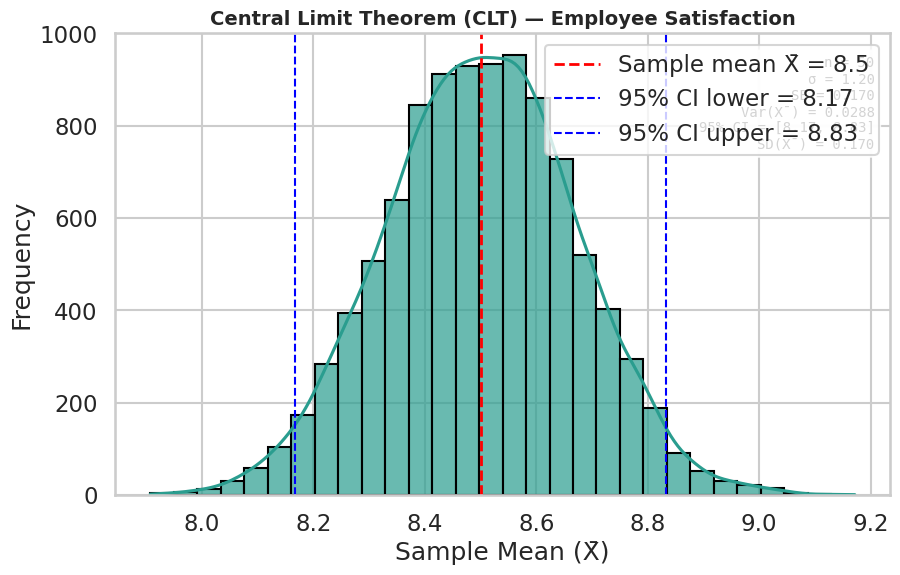

,Parameter,Value
0,Population mean (μ),8.500000
1,Sample mean (X̄),8.500000
2,Population SD (σ),1.200000
3,Sample size (n),50.000000
4,Variance of X̄ (σ²/n),0.028800
5,Standard Error (SE),0.170000
6,95% CI Lower,8.170000
7,95% CI Upper,8.830000


IntSlider(value=10000, continuous_update=False, description='Simulations:', max=50000, min=1000, step=5000, st…

Button(button_style='success', description='Resimulate', style=ButtonStyle())

Output()

In [39]:
# ===============================================================
# Central Limit Theorem (CLT) — Human Resources Example
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

# ---------------------------------------------------------------
# 1️ Scenario Setup
# ---------------------------------------------------------------
n = 50                     # Sample size
xbar = 8.5                 # Sample mean
sigma = 1.2                # Population SD (historical)
mu_true = 8.5              # Assume true mean ≈ observed mean for simulation
num_samples = 10000        # Number of simulations

# Derived parameters
se = sigma / np.sqrt(n)
ci_lower = xbar - 1.96 * se
ci_upper = xbar + 1.96 * se
var_xbar = sigma**2 / n
sd_xbar = np.sqrt(var_xbar)

# ---------------------------------------------------------------
# 2️ Simulate Sampling Distribution
# ---------------------------------------------------------------
np.random.seed(42)
# Population: simulate many "employees" with satisfaction ~ N(mu, sigma)
population = np.random.normal(mu_true, sigma, 100000)

# Draw repeated samples of size n, compute sample means
sample_means = [np.mean(np.random.choice(population, n, replace=True)) for _ in range(num_samples)]

# ---------------------------------------------------------------
# 3️ Plot Sampling Distribution
# ---------------------------------------------------------------
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True, color="#2A9D8F", edgecolor="black", alpha=0.7)
plt.axvline(xbar, color="red", linestyle="--", linewidth=2, label=f"Sample mean X̄ = {xbar}")
plt.axvline(ci_lower, color="blue", linestyle="--", linewidth=1.5, label=f"95% CI lower = {ci_lower:.2f}")
plt.axvline(ci_upper, color="blue", linestyle="--", linewidth=1.5, label=f"95% CI upper = {ci_upper:.2f}")

# Annotate parameters
text = (
    f"n = {n}\n"
    f"σ = {sigma:.2f}\n"
    f"SE = {se:.3f}\n"
    f"Var(X̄) = {var_xbar:.4f}\n"
    f"95% CI = [{ci_lower:.2f}, {ci_upper:.2f}]\n"
    f"SD(X̄) = {sd_xbar:.3f}"
)
plt.text(0.98, 0.95, text, transform=plt.gca().transAxes,
         ha="right", va="top", fontsize=10, family="monospace",
         bbox=dict(facecolor="white", alpha=0.85, boxstyle="round,pad=0.4"))

plt.title("Central Limit Theorem (CLT) — Employee Satisfaction", fontsize=14, fontweight="bold")
plt.xlabel("Sample Mean (X̄)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# ---------------------------------------------------------------
# 4️ Numeric Summary Table
# ---------------------------------------------------------------
summary_data = {
    "Parameter": [
        "Population mean (μ)", "Sample mean (X̄)", "Population SD (σ)",
        "Sample size (n)", "Variance of X̄ (σ²/n)", "Standard Error (SE)",
        "95% CI Lower", "95% CI Upper"
    ],
    "Value": [
        round(mu_true, 2), round(xbar, 2), round(sigma, 2),
        n, round(var_xbar, 4), round(se, 3),
        round(ci_lower, 2), round(ci_upper, 2)
    ]
}

df_summary = pd.DataFrame(summary_data)
display(df_summary.style.set_caption("Summary — CLT in Human Resources").background_gradient(cmap="YlOrBr"))

# ---------------------------------------------------------------
# 5️ Interactive Simulation (Optional)
# ---------------------------------------------------------------
num_slider = widgets.IntSlider(
    value=10000, min=1000, max=50000, step=5000,
    description="Simulations:", continuous_update=False, style={'description_width': 'initial'}
)
output = widgets.Output()
button = widgets.Button(description="Resimulate", button_style='success')

def on_click(b):
    with output:
        clear_output(wait=True)
        num = num_slider.value
        new_means = [np.mean(np.random.choice(population, n, replace=True)) for _ in range(num)]
        sns.histplot(new_means, bins=30, kde=True, color="#E76F51", edgecolor="black", alpha=0.7)
        plt.axvline(xbar, color="red", linestyle="--", linewidth=2)
        plt.axvline(ci_lower, color="blue", linestyle="--", linewidth=1.5)
        plt.axvline(ci_upper, color="blue", linestyle="--", linewidth=1.5)
        plt.title(f"CLT Resimulation with {num:,} samples", fontsize=13)
        plt.xlabel("Sample Mean (X̄)")
        plt.ylabel("Frequency")
        plt.show()

button.on_click(on_click)
display(num_slider, button, output)


# Example: Why the Central Limit Theorem (CLT) Matters for Non-Normal Populations

## 1️ Context and Motivation

“Most real-world populations are not normally distributed.”

This fact is fundamental.  
In practice, population data (income, age, satisfaction, waiting times, reaction times, etc.) are often:

- Skewed right: e.g., income, age, hospital stay durations  
- Skewed left: e.g., test failure rates, service completion times  
- Multimodal: e.g., exam scores from mixed ability groups  
- Discrete: e.g., counts, Likert-scale survey data  

Yet, most inferential statistical methods—like hypothesis tests and confidence intervals—assume normality.

---

## 2️ The Dilemma

Many core inferential methods are derived under the assumption:

$$X_i \sim N(\mu, \sigma^2)$$

These include:

- t-tests  
- z-tests  
- Confidence intervals for $\mu$  
- ANOVA (in classical form)  

However, in applied research, we rarely sample from truly normal populations.  

So the natural question is:  

**How can we use normal-based methods on non-normal data?**

---

## 3️ The Central Limit Theorem (CLT) as the Solution

Even if each individual observation $X_i$ comes from a non-normal population:

$$X_i \sim \text{any distribution with mean } \mu \text{ and variance } \sigma^2 < \infty$$

The sample mean:

$$\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$$

will tend toward normality as the sample size $n$ increases.  

Formally:

$$\frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \xrightarrow{d} N(0,1) \text{ as } n \to \infty$$

This means that for large enough $n$, we can safely apply methods that assume normality.

---

## 4️ Practical Rule of Thumb

The “rule of 30” in applied statistics:

$$n \ge 30 \Rightarrow \text{sampling distribution of } \bar{X} \text{ approximately normal}$$

 When $n \ge 30$:

- CLT approximation is typically reliable  
- Normal-based confidence intervals and tests are valid  
- The shape of the original distribution becomes less critical

---

## 5️ Mathematical Illustration

Consider a highly skewed population, e.g., exponential distribution with mean $\mu=10$, variance $\sigma^2=100$.  

Individual data are not normal (skewed right):

$$X_i \sim \text{Exponential}(\lambda=0.1)$$

Then for different sample sizes:

| Sample Size ($n$) | Sampling Distribution of $\bar{X}$ | Std. Error ($\sigma_{\bar{X}} = \sigma/\sqrt{n}$) | Approx. Shape |
|------------------|------------------------------------|---------------------------------|----------------|
| 1 | Exponential (skewed) | 10.00 | Skewed right |
| 5 | Moderate averaging | 4.47 | Less skewed |
| 30 | Strong averaging | 1.83 | Nearly symmetric |
| 100 | High averaging | 1.00 | Approximates Normal |

 As $n$ increases:  

- Variability (SE) decreases  
- Shape becomes more symmetric  
- Sampling distribution approaches $N(\mu, \sigma^2/n)$

---

## 6️ Connection to Hypothesis Testing

Even if $X_i$ are not normal, we can use z-tests or t-tests when $n$ is large, because:

$$\bar{X} \approx N(\mu, \sigma^2/n)$$

For hypothesis $H_0: \mu = \mu_0$:

$$Z = \frac{\bar{X} - \mu_0}{\sigma/\sqrt{n}} \sim N(0,1)$$

→ This is valid by the CLT, even if the data themselves are not normal.

---

## 7️ Confidence Intervals for Non-Normal Populations

The 95% confidence interval for the population mean is:

$$\bar{X} \pm z_{0.025} \cdot \frac{\sigma}{\sqrt{n}}$$

When $n \ge 30$, this CI remains accurate because $\bar{X}$ is approximately normal, even if $X_i$ are not.

If $\sigma$ is unknown, we replace it with $s$ (sample SD), giving the t-interval:

$$\bar{X} \pm t_{0.025, n-1} \cdot \frac{s}{\sqrt{n}}$$

Again, the validity improves with larger $n$, regardless of population shape.

---

## 8️ Interpretive Summary

| Concept | Formula / Principle | Interpretation |
|---------|------------------|----------------|
| Population distribution | Any shape | Often non-normal |
| Sampling distribution | $\bar{X}$ | Becomes normal as $n\uparrow$ |
| CLT foundation | $Z = (\bar{X}-\mu)/(\sigma/\sqrt{n})$ | Justifies normal-based inference |
| Rule of thumb | $n \ge 30$ | Normal approximation valid |
| Key effect | Shape smoothing | Averaging reduces skewness |
| Implication | Hypothesis tests & CIs remain reliable | CLT safeguards inference |


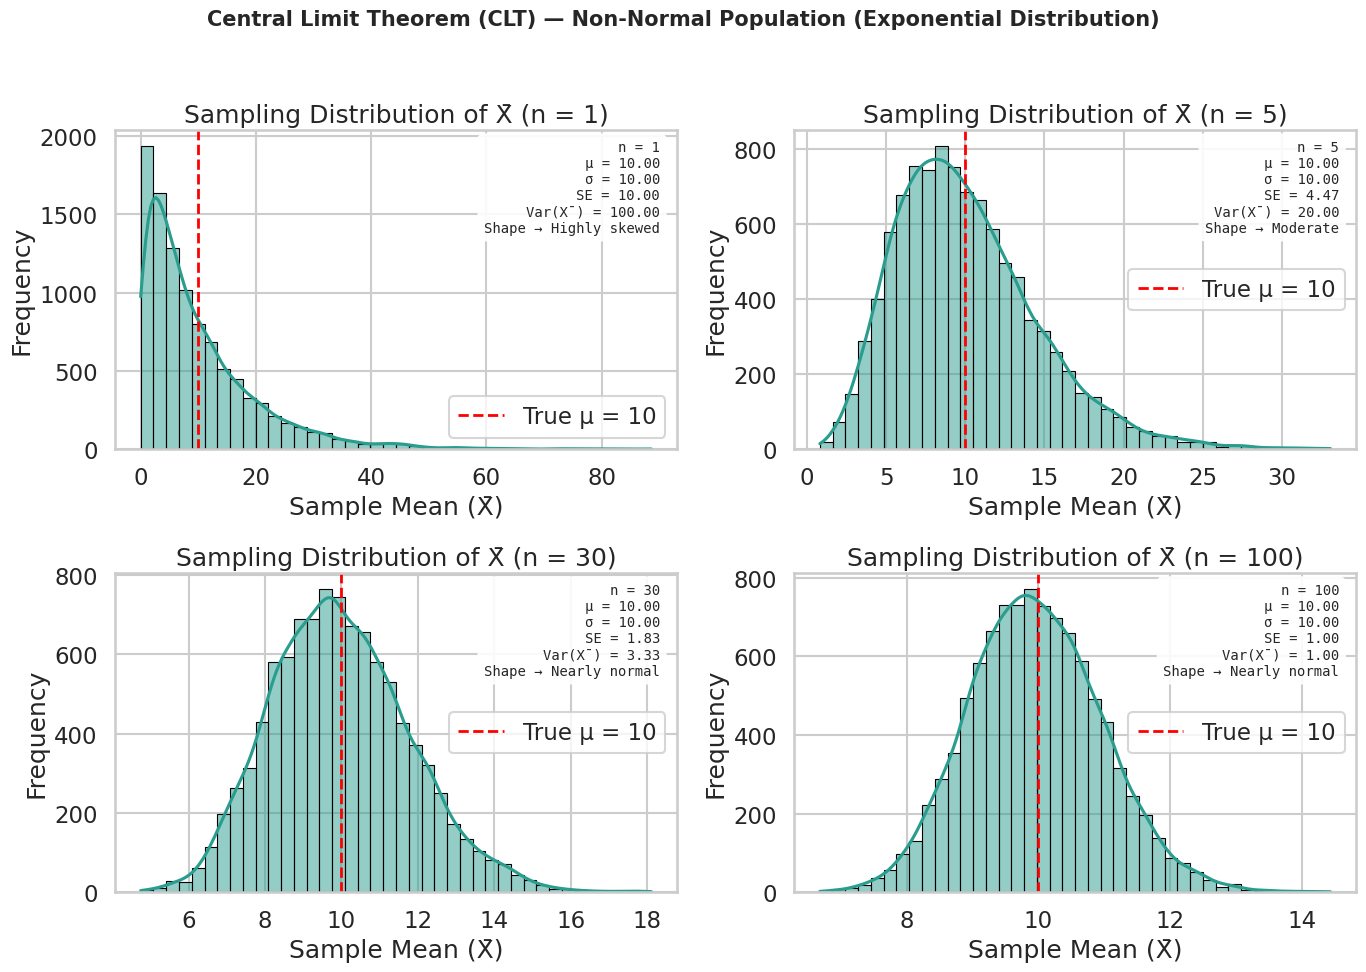

,Sample Size (n),Variance Var(X̄),Standard Error SE(X̄),Shape
0,1,100.000000,10.000000,Skewed right
1,5,20.000000,4.470000,Moderate skew
2,30,3.330000,1.830000,Nearly symmetric
3,100,1.000000,1.000000,Approx. Normal


IntSlider(value=10000, continuous_update=False, description='Simulations:', max=50000, min=1000, step=5000, st…

Button(button_style='success', description='Resimulate CLT', style=ButtonStyle())

Output()

In [40]:
# ===============================================================
# Central Limit Theorem (CLT) — Why It Matters for Non-Normal Populations
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import expon
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

# ---------------------------------------------------------------
# 1️ Population Setup — Exponential Distribution (Highly Skewed)
# ---------------------------------------------------------------
mu = 10                # Mean of exponential
sigma = 10             # SD (sqrt(variance = mu^2))
lambda_param = 1 / mu  # Rate parameter for exponential

population_size = 100000
np.random.seed(42)
population = np.random.exponential(scale=mu, size=population_size)

# ---------------------------------------------------------------
# 2️ Simulation Setup
# ---------------------------------------------------------------
sample_sizes = [1, 5, 30, 100]
num_simulations = 10000

def simulate_clt():
    results = {}
    for n in sample_sizes:
        sample_means = [np.mean(np.random.choice(population, n, replace=True)) for _ in range(num_simulations)]
        results[n] = np.array(sample_means)
    return results

results = simulate_clt()

# ---------------------------------------------------------------
# 3️ Visualization of Sampling Distributions
# ---------------------------------------------------------------
sns.set_theme(style="whitegrid", context="talk")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, n in enumerate(sample_sizes):
    sns.histplot(results[n], bins=40, kde=True, color="#2A9D8F", edgecolor="black", ax=axes[i])
    se = sigma / np.sqrt(n)

    # Annotate parameters
    text = (
        f"n = {n}\n"
        f"μ = {mu:.2f}\n"
        f"σ = {sigma:.2f}\n"
        f"SE = {se:.2f}\n"
        f"Var(X̄) = {sigma**2/n:.2f}\n"
        f"Shape → {'Highly skewed' if n==1 else 'Nearly normal' if n>=30 else 'Moderate'}"
    )
    axes[i].text(0.97, 0.97, text, transform=axes[i].transAxes,
                 ha="right", va="top", fontsize=10, family="monospace",
                 bbox=dict(facecolor="white", alpha=0.9, boxstyle="round,pad=0.4"))

    axes[i].axvline(mu, color="red", linestyle="--", linewidth=2, label=f"True μ = {mu}")
    axes[i].set_title(f"Sampling Distribution of X̄ (n = {n})")
    axes[i].set_xlabel("Sample Mean (X̄)")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

plt.suptitle("Central Limit Theorem (CLT) — Non-Normal Population (Exponential Distribution)", fontsize=15, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ---------------------------------------------------------------
# 4️ Numeric Summary Table
# ---------------------------------------------------------------
summary_data = {
    "Sample Size (n)": sample_sizes,
    "Variance Var(X̄)": [round(sigma**2 / n, 2) for n in sample_sizes],
    "Standard Error SE(X̄)": [round(sigma / np.sqrt(n), 2) for n in sample_sizes],
    "Shape": ["Skewed right", "Moderate skew", "Nearly symmetric", "Approx. Normal"]
}

df_summary = pd.DataFrame(summary_data)
display(df_summary.style.set_caption("Summary — CLT for Non-Normal Populations")
        .background_gradient(cmap="YlGnBu"))

# ---------------------------------------------------------------
# 5️ Interactive Simulation (Optional)
# ---------------------------------------------------------------
slider = widgets.IntSlider(
    value=10000, min=1000, max=50000, step=5000,
    description="Simulations:", continuous_update=False, style={'description_width': 'initial'}
)
output = widgets.Output()
button = widgets.Button(description="Resimulate CLT", button_style='success')

def on_click(b):
    with output:
        clear_output(wait=True)
        num = slider.value
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.flatten()
        for i, n in enumerate(sample_sizes):
            sample_means = [np.mean(np.random.choice(population, n, replace=True)) for _ in range(num)]
            sns.histplot(sample_means, bins=40, kde=True, color="#E76F51", edgecolor="black", ax=axes[i])
            se = sigma / np.sqrt(n)
            axes[i].axvline(mu, color="red", linestyle="--", linewidth=2)
            axes[i].set_title(f"Resimulated Sampling Distribution (n={n})")
            axes[i].set_xlabel("Sample Mean (X̄)")
            axes[i].set_ylabel("Frequency")
        plt.suptitle(f"CLT Resimulation with {num:,} samples", fontsize=15, fontweight="bold")
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

button.on_click(on_click)
display(slider, button, output)


# Point and Interval Estimates

## 1️ Conceptual Overview

In inferential statistics, we rarely know the true population parameters (e.g., true mean $\mu$, true proportion $p$, true variance $\sigma^2$).  
Instead, we estimate them from a sample.

| Type | Symbolic Form | Description | Information Provided |
|------|----------------|-------------|-------------------|
| Point Estimate | A single value | Best single-number guess of the population parameter | Precision only by point |
| Interval Estimate (Confidence Interval) | A range of values | Range of plausible values around the estimate | Reflects both precision and uncertainty |

---

## 2️ Mathematical Framework

### (a) Point Estimate

A point estimate of a population parameter $\theta$ is denoted $\hat{\theta}$.  

| Parameter (Population) | Symbol | Sample Statistic (Estimator) | Formula |
|------------------------|--------|-----------------------------|---------|
| Mean | $\mu$ | $\bar{X}$ | $$\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$$ |
| Proportion | $p$ | $\hat{p}$ | $$\hat{p} = \frac{x}{n}$$ |
| Variance | $\sigma^2$ | $s^2$ | $$s^2 = \frac{\sum_{i=1}^{n} (X_i - \bar{X})^2}{n-1}$$ |

Thus:

$$\hat{\theta} = T(X_1, X_2, \dots, X_n)$$

---

### (b) Interval Estimate

An interval estimate provides a range of values likely to contain the true population parameter:

$$\text{CI} = [\text{LCL}, \text{UCL}]$$

Confidence interval for a mean (σ known):

$$\text{CI} = \bar{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$$

Confidence interval for a mean (σ unknown):

$$\text{CI} = \bar{X} \pm t_{\alpha/2, n-1} \frac{s}{\sqrt{n}}$$

Where:  

- $\bar{X}$ = point estimate of the mean  
- $z_{\alpha/2}$ or $t_{\alpha/2, n-1}$ = critical value from Normal or t-distribution  
- $s/\sqrt{n}$ = standard error (SE), measuring variability of the estimate  

---

## 3️ Visual Breakdown of the Confidence Interval

| Component | Symbol | Formula | Interpretation |
|-----------|--------|---------|----------------|
| Lower Confidence Limit (LCL) | - | $$\text{LCL} = \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$$ | Smallest plausible value of $\mu$ |
| Point Estimate | $\bar{X}$ | $$\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$$ | Best guess for $\mu$ |
| Upper Confidence Limit (UCL) | - | $$\text{UCL} = \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$$ | Largest plausible value of $\mu$ |
| Width of CI | $W$ | $$W = 2 \cdot z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$$ | Decreases as $n \uparrow$ or $\sigma \downarrow$ |

---

## 4️ Applied Example — TV Watching Survey

| Group | Sample Size ($n$) | Sample Mean ($\bar{X}$) | Sample SD ($s$) |
|-------|------------------|-------------------------|----------------|
| British | 100 | 35 | 12 |
| American | 100 | 35 | 4 |

### (a) Point Estimate

For both:

$$\bar{X}_{Britain} = \bar{X}_{USA} = 35$$

---

### (b) Interval Estimate (95% CI)

Formula:

$$\text{CI} = \bar{X} \pm z_{0.025} \frac{s}{\sqrt{n}}, \quad z_{0.025} = 1.96$$

**British Sample:**

$$
\begin{align}
\text{CI}_{Britain} &= 35 \pm 1.96 \cdot \frac{12}{\sqrt{100}} \\
&= 35 \pm 1.96 \cdot 1.2 \\
&= 35 \pm 2.35 \\
&\Rightarrow (32.65, 37.35)
\end{align}
$$

**American Sample:**

$$
\begin{align}
\text{CI}_{USA} &= 35 \pm 1.96 \cdot \frac{4}{\sqrt{100}} \\
&= 35 \pm 1.96 \cdot 0.4 \\
&= 35 \pm 0.78 \\
&\Rightarrow (34.22, 35.78)
\end{align}
$$

---

### (c) Interpretation

| Group | Point Estimate | Confidence Interval | Width | Interpretation |
|-------|----------------|------------------|-------|----------------|
| British | 35 | (32.65, 37.35) | 4.70 | Wide interval → high variability in viewing habits |
| American | 35 | (34.22, 35.78) | 0.78 | Narrow interval → consistent viewing habits |

**Insight:** Even though both samples have the same mean, the British group’s larger SD causes a wider CI, meaning greater uncertainty about the true mean.

---

## 5️ Theoretical Implications

- Point estimates provide a concise summary but ignore uncertainty.  
- Interval estimates quantify uncertainty, improving interpretability.  
- Confidence level $(1-\alpha)$ determines reliability:  

  - 95% CI → we expect 95% of such intervals to contain $\mu$  

- Precision increases as:  

  - Sample size $n \uparrow$  
  - Population variability $\sigma \downarrow$  

---


---

## 7️ Summary Table

| Concept | Symbolic Formula | Example Value | Interpretation |
|---------|----------------|---------------|----------------|
| Point Estimate | $\hat{\mu} = \bar{X}$ | 35 | Best estimate of mean |
| SE (Standard Error) | $SE = \frac{s}{\sqrt{n}}$ | 1.2 (UK), 0.4 (US) | Variability of estimate |
| 95% CI | $\text{CI} = \bar{X} \pm 1.96 \cdot SE$ | (32.65,37.35), (34.22,35.78) | Plausible range for $\mu$ |
| CI Width | $W = 2 \cdot z_{\alpha/2} \cdot SE$ | 4.7, 0.78 | Measures precision |
| Confidence Level | $1-\alpha$ | 95% | Degree of certainty |

---

## 8️ Key Takeaways

 The point estimate gives the central value (e.g., 35).  
 The interval estimate captures the uncertainty around it.  
 The width of the CI depends on sample variability and sample size:

$$\text{Width} \propto \frac{\sigma}{\sqrt{n}}$$

 Larger $n$ or smaller $\sigma$ → narrower, more reliable intervals.  
 Confidence intervals offer a statistically honest picture of uncertainty.




POINT AND INTERVAL ESTIMATION RESULTS



,Group,Sample Mean (X̄),Sample SD (s),Standard Error (SE),Lower CI (LCL),Upper CI (UCL),CI Width
0,British,35,12,1.200000,32.648043,37.351957,4.70
1,American,35,4,0.400000,34.216014,35.783986,1.57


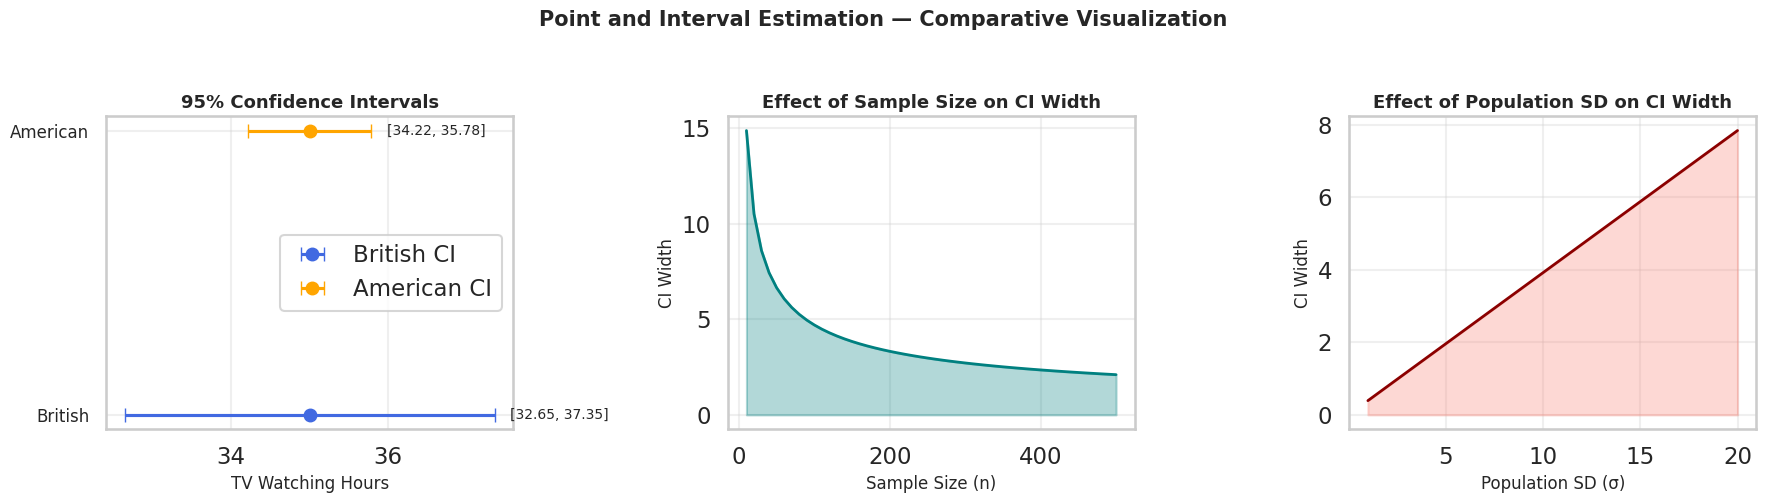


 EFFECT OF SAMPLE SIZE ON CONFIDENCE INTERVAL WIDTH (BRITISH SAMPLE)



,Sample Size (n),CI Width (95%)
0,10.000,14.875
1,20.000,10.518
2,30.000,8.588
3,40.000,7.438
4,50.000,6.652
5,60.000,6.073
6,70.000,5.622
7,80.000,5.259
8,90.000,4.958
9,100.000,4.704


In [41]:

# ==========================================================
#  Import Libraries
# ==========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# ==========================================================
#  Input Parameters
# ==========================================================
groups = {
    "British": {"mean": 35, "sd": 12, "n": 100},
    "American": {"mean": 35, "sd": 4, "n": 100}
}
confidence = 0.95
z = stats.norm.ppf(1 - (1 - confidence) / 2)

# ==========================================================
#  Compute Estimates
# ==========================================================
results = []
for group, data in groups.items():
    Xbar = data["mean"]
    s = data["sd"]
    n = data["n"]
    SE = s / np.sqrt(n)
    LCL = Xbar - z * SE
    UCL = Xbar + z * SE
    Width = UCL - LCL
    results.append([group, Xbar, s, SE, LCL, UCL, Width])

df = pd.DataFrame(results, columns=[
    "Group", "Sample Mean (X̄)", "Sample SD (s)",
    "Standard Error (SE)", "Lower CI (LCL)", "Upper CI (UCL)", "CI Width"
])

# ==========================================================
#  Display Table
# ==========================================================
print("POINT AND INTERVAL ESTIMATION RESULTS\n")
styled = df.style.background_gradient(cmap="cool")
for col in df.select_dtypes(include=[np.number]).columns:
    styled = styled.format({col: "{:.2f}"})
display(styled)

# ==========================================================
#  Create 3-Figure Layout in One Row
# ==========================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['royalblue', 'orange']

# ==========================================================
#  Figure 1: Confidence Intervals Comparison
# ==========================================================
ax = axes[0]
for i, (group, data) in enumerate(groups.items()):
    Xbar = df.loc[i, "Sample Mean (X̄)"]
    LCL = df.loc[i, "Lower CI (LCL)"]
    UCL = df.loc[i, "Upper CI (UCL)"]
    ax.errorbar(Xbar, i, xerr=[[Xbar - LCL], [UCL - Xbar]],
                fmt='o', color=colors[i], capsize=5, label=f"{group} CI")
    ax.text(UCL + 0.2, i, f"[{LCL:.2f}, {UCL:.2f}]", va='center', fontsize=10)
ax.set_yticks(range(len(groups)))
ax.set_yticklabels(groups.keys(), fontsize=12)
ax.set_xlabel("TV Watching Hours", fontsize=12)
ax.set_title("95% Confidence Intervals", fontsize=13, weight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# ==========================================================
#  Figure 2: CI Width vs. Sample Size
# ==========================================================
ax = axes[1]
sample_sizes = np.arange(10, 501, 10)
british_sd = groups["British"]["sd"]
widths = 2 * z * (british_sd / np.sqrt(sample_sizes))
ax.plot(sample_sizes, widths, lw=2, color='teal')
ax.fill_between(sample_sizes, widths, alpha=0.3, color='teal')
ax.set_title("Effect of Sample Size on CI Width", fontsize=13, weight='bold')
ax.set_xlabel("Sample Size (n)", fontsize=12)
ax.set_ylabel("CI Width", fontsize=12)
ax.grid(alpha=0.3)

# ==========================================================
#  Figure 3: CI Width vs. Standard Deviation
# ==========================================================
ax = axes[2]
s_values = np.arange(1, 21, 1)
n_fixed = 100
widths_sd = 2 * z * (s_values / np.sqrt(n_fixed))
ax.plot(s_values, widths_sd, lw=2, color='darkred')
ax.fill_between(s_values, widths_sd, alpha=0.3, color='salmon')
ax.set_title("Effect of Population SD on CI Width", fontsize=13, weight='bold')
ax.set_xlabel("Population SD (σ)", fontsize=12)
ax.set_ylabel("CI Width", fontsize=12)
ax.grid(alpha=0.3)

# ==========================================================
#  Layout Adjustment
# ==========================================================
plt.suptitle("Point and Interval Estimation — Comparative Visualization", fontsize=15, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ==========================================================
#  Summary Table for Simulation
# ==========================================================
summary_table = pd.DataFrame({
    "Sample Size (n)": sample_sizes,
    "CI Width (95%)": widths
})
print("\n EFFECT OF SAMPLE SIZE ON CONFIDENCE INTERVAL WIDTH (BRITISH SAMPLE)\n")
display(summary_table.head(10).style.background_gradient(cmap="YlGnBu").format("{:.3f}"))


# Confidence Intervals

## 1️ Concept: From Point to Interval Estimation

A point estimate gives a single best value for an unknown population parameter (e.g., mean, proportion, variance).  
However, every estimate based on a sample is subject to sampling variability.  

Thus, we construct an **interval estimate** to capture the range of values within which the true population parameter is likely to lie, given our level of confidence.

$$\text{Confidence Interval (CI)} = \text{Point Estimate} \pm (\text{Critical Value}) \times (\text{Standard Error})$$

---

## 2️ Formula Components Explained

| Term | Symbol | Interpretation |
|------|--------|----------------|
| Point Estimate | $\hat{\theta}$ (e.g., $\bar{X}$) | The sample statistic that estimates the true parameter |
| Critical Value | $z_{\alpha/2}$ or $t_{\alpha/2, n-1}$ | Number of standard deviations to move from the mean to achieve the desired confidence level |
| Standard Error (SE) | $\frac{\sigma}{\sqrt{n}}$ or $\frac{s}{\sqrt{n}}$ | Measures the dispersion (variability) of the estimator |

**General CI formula:**

$$\text{CI} = \hat{\theta} \pm (\text{CV}) \times (\text{SE})$$

---

## 3️ Confidence Level and α

- Confidence level = Probability that a constructed interval contains the true population parameter if repeated infinitely many times:  

$$1-\alpha = \text{Confidence Coefficient}$$  

- $\alpha = \text{Significance Level}$  

| Confidence Level | Confidence Coefficient | Tail Area ($\alpha/2$) | $z_{\alpha/2}$ |
|-----------------|----------------------|------------------------|----------------|
| 80%  | 0.80  | 0.10   | 1.28 |
| 90%  | 0.90  | 0.05   | 1.645 |
| 95%  | 0.95  | 0.025  | 1.96 |
| 98%  | 0.98  | 0.01   | 2.33 |
| 99%  | 0.99  | 0.005  | 2.58 |
| 99.8%| 0.998 | 0.001  | 3.08 |
| 99.9%| 0.999 | 0.0005 | 3.27 |

**Example — 97% Confidence Level:**  

- $(1-\alpha) = 0.97 \Rightarrow \alpha = 0.03$  
- Each tail: $\alpha/2 = 0.015$  
- From z-tables: $z_{0.015} = 2.17$  

 Therefore, for a 97% CI, use $z = 2.17$.

---

## 4️ Interpreting the Confidence Level

- If we take many samples and construct a CI from each:  

  - Approximately $(1-\alpha)\times100\%$ of those intervals would contain the true $\mu$  
  - $\alpha \times 100\%$ would not  

- For a single interval: it **either does or does not contain** $\mu$.  
Confidence level is a **long-run frequency interpretation**, not a probability for a single interval.

---

## 5️ Confidence Interval for the Mean (σ Known)

When:

1. Population SD $\sigma$ is known, and  
2. Population is normal, or $n > 30$ (CLT applies)  

Then the CI for $\mu$ is:

$$\text{CI} = \bar{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$$

Where:

- $\bar{X}$ = sample mean  
- $z_{\alpha/2}$ = z-critical value  
- $\sigma$ = population SD  
- $n$ = sample size  

---

###  Example 1 — Known σ (Normal Distribution)

Let:  

- $n = 100$, $\bar{X} = 50$, $\sigma = 10$  
- 95% CI → $z_{\alpha/2} = 1.96$  

Compute:  

$$
\begin{align}
\text{CI} &= 50 \pm 1.96 \frac{10}{\sqrt{100}} \\
&= 50 \pm 1.96 \cdot 1 \\
&= 50 \pm 1.96 \\
&\Rightarrow (48.04, 51.96)
\end{align}
$$

 Interpretation: We are 95% confident that $\mu \in (48.04, 51.96)$

---

###  Example 2 — Increasing Confidence Level

99% CI → $z_{\alpha/2} = 2.58$  

$$
\begin{align}
\text{CI} &= 50 \pm 2.58 \cdot 1 \\
&= 50 \pm 2.58 \\
&\Rightarrow (47.42, 52.58)
\end{align}
$$

 Interpretation: Higher confidence → wider interval.

---

### Example 3 — Larger Sample, Same Variability

$n = 400$, $\sigma = 10$, 95% CI:

$$
\begin{align}
\text{CI} &= 50 \pm 1.96 \frac{10}{\sqrt{400}} \\
&= 50 \pm 1.96 \cdot 0.5 \\
&= 50 \pm 0.98 \\
&\Rightarrow (49.02, 50.98)
\end{align}
$$

 Interpretation: Larger $n$ → smaller SE → narrower, more precise interval.

---

## 6️ Confidence Interval Formula — General Form

| Case | Formula | Distribution | Notes |
|------|---------|-------------|-------|
| μ (σ known) | $$\bar{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$$ | Normal (Z) | n ≥ 30 or population normal |
| μ (σ unknown) | $$\bar{X} \pm t_{\alpha/2, n-1} \frac{s}{\sqrt{n}}$$ | Student's t | Small sample; σ estimated by s |
| p (proportion) | $$\hat{p} \pm z_{\alpha/2} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$ | Normal (Z) | Large n, np ≥ 5, n(1–p) ≥ 5 |
| σ² (variance) | $$(n-1)s^2/\chi^2_{\alpha/2} \le \sigma^2 \le (n-1)s^2/\chi^2_{1-\alpha/2}$$ | Chi-square | For variance estimates |

---

## 7️ Statistical Interpretation Summary

| Parameter | Point Estimate | Interval Formula | Interpretation |
|-----------|----------------|-----------------|----------------|
| Mean (σ known) | $\bar{X}$ | $\bar{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$ | True mean lies in range |
| Mean (σ unknown) | $\bar{X}$ | $\bar{X} \pm t_{\alpha/2, n-1} \frac{s}{\sqrt{n}}$ | Use t for small n |
| Proportion | $\hat{p}$ | $\hat{p} \pm z_{\alpha/2} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$ | True proportion lies within interval |
| Variance | $s^2$ | $\chi^2$-based CI | Confidence interval for $\sigma^2$ |

---

## 8️ Key Observations

| Factor | Effect on CI Width | Explanation |
|--------|------------------|-------------|
| ↑ Confidence Level | ↑ Width | More certainty → larger z-value |
| ↑ Sample Size ($n$) | ↓ Width | More information → lower SE |
| ↑ σ (Variability) | ↑ Width | More spread → less precision |

- Precision and confidence are trade-offs:  

$$\text{Precision} \propto \frac{1}{z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}}$$

---

## 9️ Final Interpretation (Philosophy)

- A 95% CI does **not** mean 95% probability that μ lies in this interval.  
- If repeated sampling constructs 100 intervals, about 95 will contain μ:  

$$P(\text{LCL} \le \mu \le \text{UCL}) = 1 - \alpha$$

- Confidence intervals combine **point estimation** and **uncertainty quantification** into one coherent inferential statement.

---

###  Summary Box

| Concept | Formula | Interpretation |
|---------|---------|----------------|
| General CI | $\hat{\theta} \pm (\text{CV})(\text{SE})$ | Generic CI formula |
| CI for μ (σ known) | $\bar{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$ | Parametric CI |
| CI width | $W = 2 z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$ | Depends on α, σ, n |
| Confidence level | $1-\alpha$ | Frequency coverage of true μ |
| 97% level | $z_{\alpha/2} = 2.17$ | Higher than 95% (1.96) |
| Main trade-off | Confidence ↑ → Width ↑ | Precision vs. Certainty |


CONFIDENCE INTERVAL RESULTS (Known and Unknown σ)
-------------------------------------------------------------


n,Confidence Level,z-critical,t-critical,Sample Mean,Std. Error (σ known),Std. Error (σ unknown),Z-CI Lower,Z-CI Upper,T-CI Lower,T-CI Upper
30,90%,1.645000,1.699000,48.119000,1.826000,1.643000,45.115000,51.122000,45.327000,50.911000
30,95%,1.960000,2.045000,48.119000,1.826000,1.643000,44.540000,51.697000,44.758000,51.479000
30,99%,2.576000,2.756000,48.119000,1.826000,1.643000,43.416000,52.821000,43.589000,52.648000
100,90%,1.645000,1.660000,49.684000,1.000000,0.954000,48.039000,51.329000,48.100000,51.268000
100,95%,1.960000,1.984000,49.684000,1.000000,0.954000,47.724000,51.644000,47.792000,51.577000
100,99%,2.576000,2.626000,49.684000,1.000000,0.954000,47.109000,52.260000,47.179000,52.190000
400,90%,1.645000,1.649000,50.111000,0.500000,0.494000,49.289000,50.934000,49.297000,50.926000
400,95%,1.960000,1.966000,50.111000,0.500000,0.494000,49.132000,51.091000,49.140000,51.083000
400,99%,2.576000,2.588000,50.111000,0.500000,0.494000,48.824000,51.399000,48.832000,51.391000


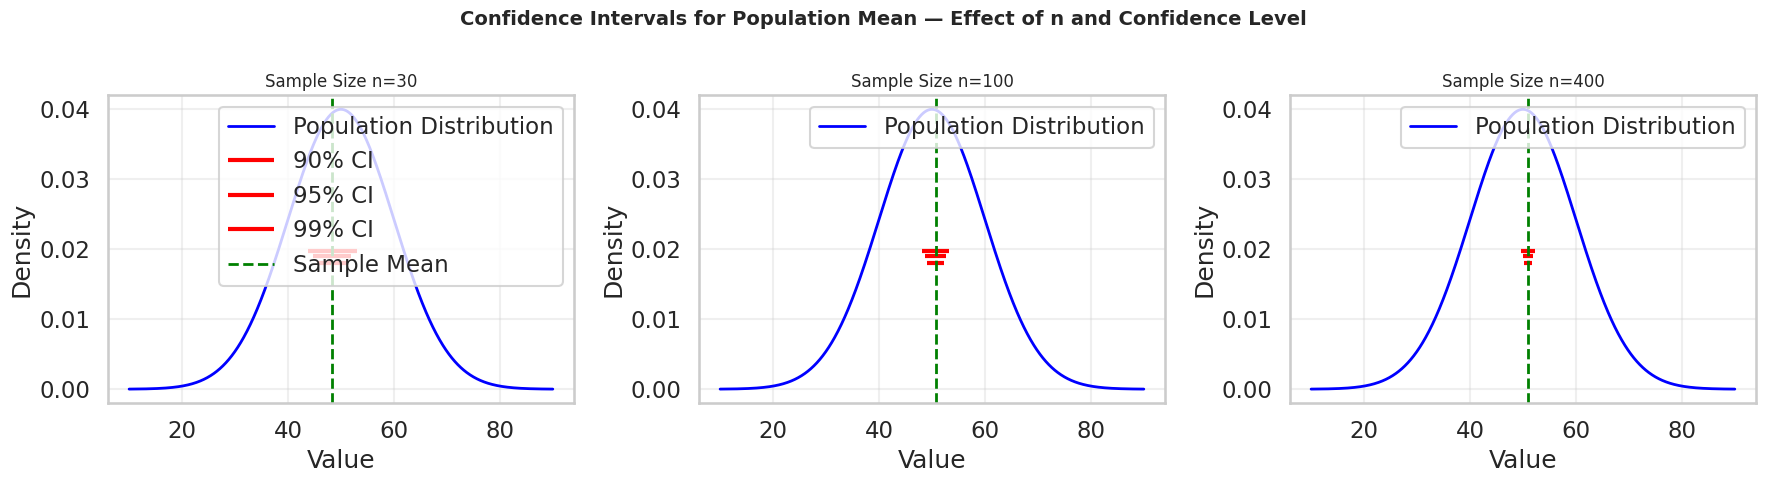


EFFECT OF PARAMETERS ON CI WIDTH
-------------------------------------------------------------


Factor,Effect on CI Width,Explanation
↑ Confidence Level,↑ Width,More certainty → larger z-value
↑ Sample Size (n),↓ Width,More information → lower SE
↑ σ (Variability),↑ Width,More spread → less precision


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# -----------------------------
# 1️ Simulation Parameters
# -----------------------------
μ = 50               # True population mean
σ = 10               # Population standard deviation
sample_sizes = [30, 100, 400]   # Sample sizes to compare
confidence_levels = [0.90, 0.95, 0.99]   # Confidence levels
np.random.seed(42)   # Reproducibility

# Function: Compute Z-based CI for known σ
def ci_known_sigma(sample_mean, σ, n, confidence):
    α = 1 - confidence
    z = stats.norm.ppf(1 - α/2)
    se = σ / np.sqrt(n)
    lcl = sample_mean - z * se
    ucl = sample_mean + z * se
    return lcl, ucl, z, se

# Function: Compute t-based CI for unknown σ
def ci_unknown_sigma(sample, confidence):
    n = len(sample)
    mean = np.mean(sample)
    s = np.std(sample, ddof=1)
    α = 1 - confidence
    t = stats.t.ppf(1 - α/2, df=n-1)
    se = s / np.sqrt(n)
    lcl = mean - t * se
    ucl = mean + t * se
    return lcl, ucl, t, se

# -----------------------------
# 2️ Run Simulation and Store Results
# -----------------------------
results = []

for n in sample_sizes:
    sample = np.random.normal(μ, σ, n)
    sample_mean = np.mean(sample)

    for cl in confidence_levels:
        lcl_z, ucl_z, z_val, se_z = ci_known_sigma(sample_mean, σ, n, cl)
        lcl_t, ucl_t, t_val, se_t = ci_unknown_sigma(sample, cl)

        results.append({
            'n': n,
            'Confidence Level': f"{int(cl*100)}%",
            'z-critical': round(z_val, 3),
            't-critical': round(t_val, 3),
            'Sample Mean': round(sample_mean, 3),
            'Std. Error (σ known)': round(se_z, 3),
            'Std. Error (σ unknown)': round(se_t, 3),
            'Z-CI Lower': round(lcl_z, 3),
            'Z-CI Upper': round(ucl_z, 3),
            'T-CI Lower': round(lcl_t, 3),
            'T-CI Upper': round(ucl_t, 3),
        })

df_results = pd.DataFrame(results)

# -----------------------------
# 3️ Display Numeric Output
# -----------------------------
print("CONFIDENCE INTERVAL RESULTS (Known and Unknown σ)")
print("-------------------------------------------------------------")
display(df_results.style.hide(axis='index'))

# -----------------------------
# 4️ Visualization — 3 Figures in One Row
# -----------------------------
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
x = np.linspace(μ - 4*σ, μ + 4*σ, 1000)
y = stats.norm.pdf(x, μ, σ)

for i, n in enumerate(sample_sizes):
    axs[i].plot(x, y, label='Population Distribution', color='blue', lw=2)

    sample = np.random.normal(μ, σ, n)
    sample_mean = np.mean(sample)
    for cl in confidence_levels:
        lcl, ucl, z, se = ci_known_sigma(sample_mean, σ, n, cl)
        axs[i].hlines(y=max(y)*0.5*cl, xmin=lcl, xmax=ucl,
                      color='red', lw=3, label=f'{int(cl*100)}% CI' if i==0 else "")

    axs[i].axvline(sample_mean, color='green', linestyle='--', lw=2, label='Sample Mean' if i==0 else "")
    axs[i].set_title(f'Sample Size n={n}', fontsize=12)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')
    axs[i].legend(loc='upper right')
    axs[i].grid(alpha=0.3)

plt.suptitle('Confidence Intervals for Population Mean — Effect of n and Confidence Level', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# -----------------------------
# 5️ Interpretation Summary Table (Numeric Only)
# -----------------------------
summary = pd.DataFrame({
    'Factor': ['↑ Confidence Level', '↑ Sample Size (n)', '↑ σ (Variability)'],
    'Effect on CI Width': ['↑ Width', '↓ Width', '↑ Width'],
    'Explanation': [
        'More certainty → larger z-value',
        'More information → lower SE',
        'More spread → less precision'
    ]
})

print("\nEFFECT OF PARAMETERS ON CI WIDTH")
print("-------------------------------------------------------------")
display(summary.style.hide(axis='index'))


With increasing **sample size ($n$)**, **standard errors decrease**, producing **narrower confidence intervals**, reflecting higher precision in estimating the population mean. Higher **confidence levels** widen intervals to ensure greater certainty. For small $n$, **T-intervals** are slightly wider than Z-intervals, accounting for unknown $\sigma$, but differences vanish as $n$ grows. Overall, larger $n$ → precise estimates; higher confidence → wider, more reliable intervals.


# Example: Confidence Interval for the Mean (σ Known)

## 1️ Problem Setup
A sample of $n = 11$ circuits is drawn from a normal population.

| Quantity                  | Symbol | Value   | Description                        |
|----------------------------|--------|---------|------------------------------------|
| Sample mean                | $\bar{X}$ | 2.20 Ω | Mean resistance of sampled circuits |
| Population standard deviation | $\sigma$ | 0.35 Ω | Known population SD               |
| Sample size                | $n$    | 11      | Number of sampled circuits         |
| Confidence level           | $1-\alpha$ | 0.95   | 95% confidence                     |

Goal: Find 95% CI for population mean $\mu$.

---

## 2️ Formula
Since $\sigma$ is known and population is normal:

$$
\text{CI} = \bar{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}
$$

Where:  
- $z_{\alpha/2}$ = z-critical value  
- $\sigma/\sqrt{n}$ = standard error (SE)  

---

## 3️ Compute Standard Error (SE)

$$
SE = \frac{\sigma}{\sqrt{n}} = \frac{0.35}{\sqrt{11}} = \frac{0.35}{3.3166} \approx 0.1055
$$

 Standard Error = 0.1055 Ω

---

## 4️ Find Critical Value ($z_{\alpha/2}$)

For 95% confidence:  
$$
\alpha = 1 - 0.95 = 0.05, \quad \alpha/2 = 0.025
$$

From Z-table: $z_{0.025} = 1.96$  
 Critical Value = 1.96

---

## 5️ Construct the Confidence Interval

$$
\text{CI} = \bar{X} \pm z_{\alpha/2} \cdot SE = 2.20 \pm 1.96 \cdot 0.1055
$$

$$
2.20 \pm 0.2068
$$

- Lower Limit (LCL) = $2.20 - 0.2068 = 1.9932$  
- Upper Limit (UCL) = $2.20 + 0.2068 = 2.4068$  

 95% CI: $1.9932 \leq \mu \leq 2.4068$

---

## 6️ Interpretation
We are 95% confident that the true mean resistance $\mu$ of all circuits lies between **1.9932 Ω** and **2.4068 Ω**.  
If repeated many times, 95% of such intervals would contain the true mean.

---

## 7️ Precision & Interval Width

$$
W = UCL - LCL = 2.4068 - 1.9932 = 0.4136
$$

Margin of Error (Half-width):

$$
E = \frac{W}{2} = 0.2068
$$

Interpretation: The sample mean may differ from $\mu$ by ±0.2068 Ω, 95% of the time.

---

## 8️ Statistical Discussion

| Concept                 | Explanation |
|-------------------------|-------------|
| Known $\sigma$           | Use Z rather than t. |
| Small sample ($n=11$)   | Z valid because population is normal. |
| Precision               | Narrow width (~0.41 Ω) indicates good precision. |
| Confidence interpretation | 95% CI reflects method reliability, not a single interval probability. |
| Assumptions             | Random sampling, independence, normal population. |

---

##  Sensitivity Insight

| Change                      | Effect on CI             |
|------------------------------|-------------------------|
| ↑ $n$                        | ↓ SE → narrower CI      |
| ↓ $n$                        | ↑ SE → wider CI         |
| ↑ confidence (e.g., 99%)     | ↑ $z_{\alpha/2}$ → wider CI |
| ↓ confidence (e.g., 90%)     | ↓ $z_{\alpha/2}$ → narrower CI |

---

##  Final Summary

| Quantity       | Symbol       | Formula / Value      | Result               |
|----------------|-------------|-------------------|--------------------|
| Sample mean    | $\bar{X}$   | —                 | 2.20               |
| Population SD  | $\sigma$    | —                 | 0.35               |
| Sample size    | $n$         | —                 | 11                 |
| SE             | $\sigma/\sqrt{n}$ | —           | 0.1055             |
| $z_{\alpha/2}$ | —           | —                 | 1.96               |
| Margin of Error | $E = z_{\alpha/2} \cdot SE$ | — | 0.2068             |
| CI for $\mu$   | $\bar{X} \pm E$ | —               | (1.9932, 2.4068)  |

**Interpretive Conclusion:**  
Based on a sample of 11 circuits, with known population SD of 0.35 Ω, the 95% confidence interval estimates the true mean resistance lies between **1.9932 Ω** and **2.4068 Ω**, demonstrating valid inference even with a small sample under normality assumption.


CONFIDENCE INTERVAL CALCULATION RESULTS
-------------------------------------------------------------


Quantity,Symbol / Formula,Result
Sample Mean (X̄),—,2.200000
Population SD (σ),—,0.350000
Sample Size (n),—,11.000000
Standard Error (SE),σ / √n,0.105500
z-critical (zα/2),norm.ppf(1 - α/2),1.960000
Margin of Error (E),zα/2 × SE,0.206800
Lower Limit (LCL),X̄ − E,1.993200
Upper Limit (UCL),X̄ + E,2.406800
Interval Width (W),UCL − LCL,0.413700


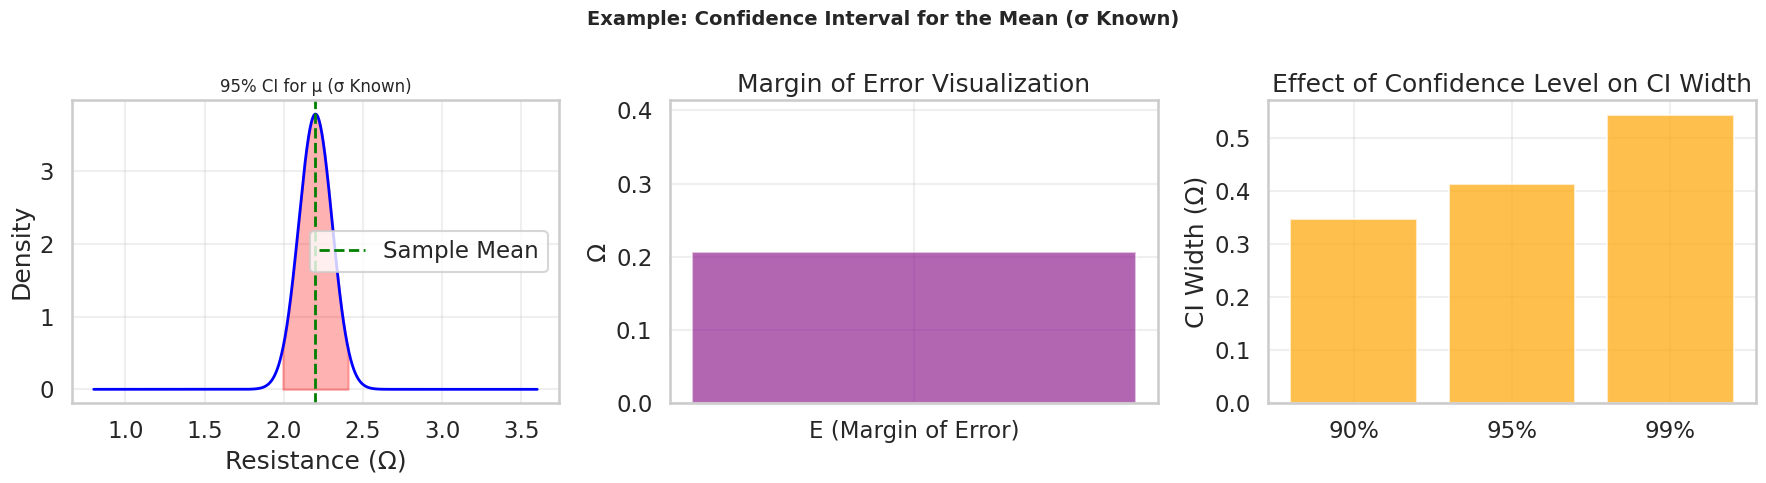


SENSITIVITY ANALYSIS — CI WIDTH EFFECTS
-------------------------------------------------------------


Change,Effect on CI
↑ n,↓ SE → Narrower CI
↓ n,↑ SE → Wider CI
↑ Confidence,↑ zα/2 → Wider CI
↓ Confidence,↓ zα/2 → Narrower CI


In [43]:
#  Example: Confidence Interval for the Mean (σ Known)
# Given data:
#   X̄ = 2.20 Ω
#   σ = 0.35 Ω
#   n = 11
#   Confidence level = 0.95
# Goal: Construct the 95% Confidence Interval for μ
# -------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# -----------------------------
# 1️ Given Parameters
# -----------------------------
X_bar = 2.20    # Sample mean
sigma = 0.35    # Population SD
n = 11          # Sample size
confidence = 0.95

# -----------------------------
# 2️ Compute Standard Error (SE)
# -----------------------------
SE = sigma / np.sqrt(n)
SE

# -----------------------------
# 3️ Critical Value (zα/2)
# -----------------------------
alpha = 1 - confidence
z_critical = norm.ppf(1 - alpha / 2)

# -----------------------------
# 4️ Compute Confidence Interval
# -----------------------------
E = z_critical * SE
LCL = X_bar - E
UCL = X_bar + E
W = UCL - LCL

# -----------------------------
# 5️ Numeric Results Table
# -----------------------------
results = pd.DataFrame({
    'Quantity': ['Sample Mean (X̄)', 'Population SD (σ)', 'Sample Size (n)',
                 'Standard Error (SE)', 'z-critical (zα/2)',
                 'Margin of Error (E)', 'Lower Limit (LCL)',
                 'Upper Limit (UCL)', 'Interval Width (W)'],
    'Symbol / Formula': ['—', '—', '—', 'σ / √n', 'norm.ppf(1 - α/2)',
                         'zα/2 × SE', 'X̄ − E', 'X̄ + E', 'UCL − LCL'],
    'Result': [X_bar, sigma, n, round(SE, 4), round(z_critical, 2),
               round(E, 4), round(LCL, 4), round(UCL, 4), round(W, 4)]
})

print("CONFIDENCE INTERVAL CALCULATION RESULTS")
print("-------------------------------------------------------------")
display(results.style.hide(axis='index'))

# -----------------------------
# 6️ Visualization — Sampling Distribution with CI
# -----------------------------
μ = X_bar  # Centered at sample mean for visualization
x = np.linspace(μ - 4 * sigma, μ + 4 * sigma, 1000)
y = norm.pdf(x, loc=μ, scale=SE)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# (a) Sampling Distribution
axs[0].plot(x, y, color='blue', lw=2)
axs[0].fill_between(x, y, 0, where=(x >= LCL) & (x <= UCL), color='red', alpha=0.3)
axs[0].axvline(X_bar, color='green', linestyle='--', lw=2, label='Sample Mean')
axs[0].set_title("95% CI for μ (σ Known)", fontsize=12)
axs[0].set_xlabel("Resistance (Ω)")
axs[0].set_ylabel("Density")
axs[0].legend()
axs[0].grid(alpha=0.3)

# (b) Margin of Error Visualization
axs[1].bar(['E (Margin of Error)'], [E], color='purple', alpha=0.6)
axs[1].set_ylim(0, E * 2)
axs[1].set_ylabel('Ω')
axs[1].set_title('Margin of Error Visualization')
axs[1].grid(alpha=0.3)

# (c) Effect of Confidence Level
confidence_levels = [0.90, 0.95, 0.99]
widths = []
for c in confidence_levels:
    z_val = norm.ppf(1 - (1 - c)/2)
    widths.append(2 * z_val * SE)
axs[2].bar(['90%', '95%', '99%'], widths, color='orange', alpha=0.7)
axs[2].set_ylabel('CI Width (Ω)')
axs[2].set_title('Effect of Confidence Level on CI Width')
axs[2].grid(alpha=0.3)

plt.suptitle("Example: Confidence Interval for the Mean (σ Known)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# -----------------------------
# 7️ Sensitivity Table (Numeric Only)
# -----------------------------
sensitivity = pd.DataFrame({
    'Change': ['↑ n', '↓ n', '↑ Confidence', '↓ Confidence'],
    'Effect on CI': ['↓ SE → Narrower CI', '↑ SE → Wider CI',
                     '↑ zα/2 → Wider CI', '↓ zα/2 → Narrower CI']
})

print("\nSENSITIVITY ANALYSIS — CI WIDTH EFFECTS")
print("-------------------------------------------------------------")
display(sensitivity.style.hide(axis='index'))


# Example: Confidence Interval for Apartment Rent

## Problem Setup
You plan to rent an unfurnished one-bedroom apartment in Durham, NC next year.  
A random sample of $n = 60$ listings from Craigslist shows:

| Quantity                  | Symbol | Value      | Description                  |
|----------------------------|--------|-----------|------------------------------|
| Sample mean                | $\bar{X}$ | \$1000   | Average monthly rent         |
| Population SD              | $\sigma$ | \$200    | Known population standard deviation |
| Sample size                | $n$    | 60        | Number of listings sampled   |
| Confidence level           | $1-\alpha$ | 0.95    | 95% confidence               |

Goal: Construct a 95% confidence interval for the true mean rent $\mu$.

---

## Formula

Since $\sigma$ is known:

$$
\text{CI} = \bar{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}
$$

---

## Application

Substitute values:

$$
\text{CI} = 1000 \pm 1.96 \cdot \frac{200}{\sqrt{60}}
$$

Compute standard error:

$$
SE = \frac{200}{\sqrt{60}} \approx 25.82
$$

Multiply by $z_{\alpha/2}$:

$$
1.96 \cdot 25.82 \approx 50.61
$$

Construct the interval:

$$
\text{CI} = 1000 \pm 50.61
$$

$$
\text{CI} = (949.39, 1050.61)
$$

---

## Interpretation

We are 95% confident that the true mean monthly rent for one-bedroom apartments listed on Craigslist in Durham, NC lies between **\$949.39** and **\$1050.61**.  

This interval accounts for sampling variability and reflects the likely range of the population mean rent.


CONFIDENCE INTERVAL RESULTS — APARTMENT RENT
-------------------------------------------------------------


Quantity,Symbol / Formula,Result
Sample Mean (X̄),—,1000.000000
Population SD (σ),—,200.000000
Sample Size (n),—,60.000000
Standard Error (SE),σ / √n,25.820000
z-critical (zα/2),norm.ppf(1 - α/2),1.960000
Margin of Error (E),zα/2 × SE,50.610000
Lower Limit (LCL),X̄ − E,949.390000
Upper Limit (UCL),X̄ + E,1050.610000
Interval Width (W),UCL − LCL,101.210000


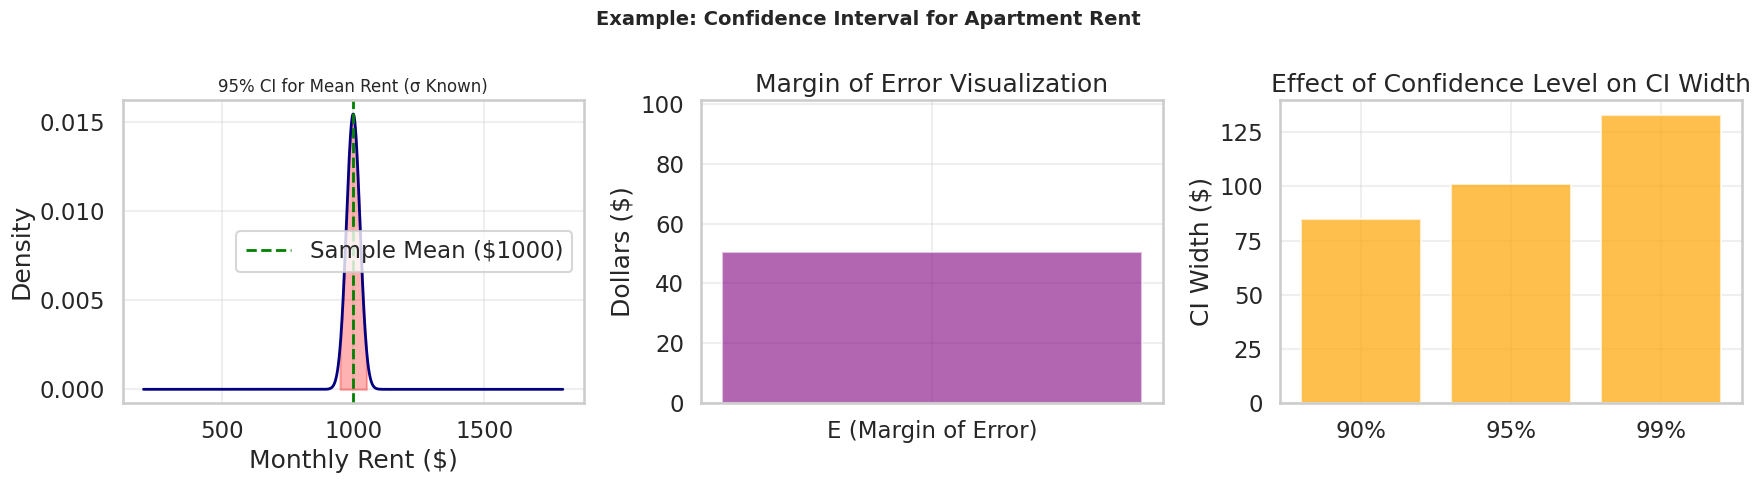


INTERPRETATION SUMMARY
-------------------------------------------------------------


Aspect,Details
Confidence Level (1−α),0.95 (zα/2 = 1.96)
Sample Size (n),60
Sample Mean (X̄),$1000
Population SD (σ),$200
95% CI for μ,"($949.39, $1050.61)"
Interpretation,We are 95% confident that the true mean rent lies between $949.39 and $1050.61.


In [44]:
#  Example: Confidence Interval for Apartment Rent(σ Known)
# -------------------------------------------------------
# -------------------------------------------------------
# Given data:
#   X̄ = $1000
#   σ = $200
#   n = 60
#   Confidence level = 0.95
# Goal: Construct the 95% Confidence Interval for μ
# -------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# -----------------------------
# 1️ Given Parameters
# -----------------------------
X_bar = 1000     # Sample mean ($)
sigma = 200      # Population SD ($)
n = 60           # Sample size
confidence = 0.95

# -----------------------------
# 2️ Compute Standard Error (SE)
# -----------------------------
SE = sigma / np.sqrt(n)

# -----------------------------
# 3️ Critical Value (zα/2)
# -----------------------------
alpha = 1 - confidence
z_critical = norm.ppf(1 - alpha / 2)

# -----------------------------
# 4️ Compute Confidence Interval
# -----------------------------
E = z_critical * SE
LCL = X_bar - E
UCL = X_bar + E
W = UCL - LCL

# -----------------------------
# 5️ Numeric Results Table
# -----------------------------
results = pd.DataFrame({
    'Quantity': ['Sample Mean (X̄)', 'Population SD (σ)', 'Sample Size (n)',
                 'Standard Error (SE)', 'z-critical (zα/2)',
                 'Margin of Error (E)', 'Lower Limit (LCL)',
                 'Upper Limit (UCL)', 'Interval Width (W)'],
    'Symbol / Formula': ['—', '—', '—', 'σ / √n', 'norm.ppf(1 - α/2)',
                         'zα/2 × SE', 'X̄ − E', 'X̄ + E', 'UCL − LCL'],
    'Result': [X_bar, sigma, n, round(SE, 2), round(z_critical, 2),
               round(E, 2), round(LCL, 2), round(UCL, 2), round(W, 2)]
})

print("CONFIDENCE INTERVAL RESULTS — APARTMENT RENT")
print("-------------------------------------------------------------")
display(results.style.hide(axis='index'))

# -----------------------------
# 6️ Visualization — 3 Subplots
# -----------------------------
μ = X_bar  # Centered at sample mean
x = np.linspace(μ - 4 * sigma, μ + 4 * sigma, 1000)
y = norm.pdf(x, loc=μ, scale=SE)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# (a) Sampling Distribution with CI
axs[0].plot(x, y, color='navy', lw=2)
axs[0].fill_between(x, y, 0, where=(x >= LCL) & (x <= UCL), color='red', alpha=0.3)
axs[0].axvline(X_bar, color='green', linestyle='--', lw=2, label='Sample Mean ($1000)')
axs[0].set_title("95% CI for Mean Rent (σ Known)", fontsize=12)
axs[0].set_xlabel("Monthly Rent ($)")
axs[0].set_ylabel("Density")
axs[0].legend()
axs[0].grid(alpha=0.3)

# (b) Margin of Error Visualization
axs[1].bar(['E (Margin of Error)'], [E], color='purple', alpha=0.6)
axs[1].set_ylim(0, E * 2)
axs[1].set_ylabel('Dollars ($)')
axs[1].set_title('Margin of Error Visualization')
axs[1].grid(alpha=0.3)

# (c) Effect of Confidence Level
confidence_levels = [0.90, 0.95, 0.99]
widths = []
for c in confidence_levels:
    z_val = norm.ppf(1 - (1 - c)/2)
    widths.append(2 * z_val * SE)
axs[2].bar(['90%', '95%', '99%'], widths, color='orange', alpha=0.7)
axs[2].set_ylabel('CI Width ($)')
axs[2].set_title('Effect of Confidence Level on CI Width')
axs[2].grid(alpha=0.3)

plt.suptitle("Example: Confidence Interval for Apartment Rent", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# -----------------------------
# 7️ Interpretation Summary
# -----------------------------
interpretation = pd.DataFrame({
    'Aspect': [
        'Confidence Level (1−α)',
        'Sample Size (n)',
        'Sample Mean (X̄)',
        'Population SD (σ)',
        '95% CI for μ',
        'Interpretation'
    ],
    'Details': [
        '0.95 (zα/2 = 1.96)',
        '60',
        '$1000',
        '$200',
        '($949.39, $1050.61)',
        'We are 95% confident that the true mean rent lies between $949.39 and $1050.61.'
    ]
})

print("\nINTERPRETATION SUMMARY")
print("-------------------------------------------------------------")
display(interpretation.style.hide(axis='index'))


# Example: Estimating Average Height of Men (σ Known)

## Problem Setup
A researcher wants to estimate the true mean height (μ) of men.  
Sample data:

| Quantity                | Symbol | Value     | Description                   |
|-------------------------|--------|----------|-------------------------------|
| Sample mean             | $\bar{X}$ | 175 cm   | Mean height of sample         |
| Population SD           | $\sigma$ | 20 cm    | Known population standard deviation |
| Sample size             | $n$    | 40       | Number of men in sample       |
| Confidence level        | $1-\alpha$ | 0.95    | 95% confidence                |
| Z-critical value        | $z_{\alpha/2}$ | 1.96     | From standard normal table     |

Goal: Construct a 95% confidence interval for μ.

---

## Formula
Since σ is known and n ≥ 30:

$$
CI_\mu = \bar{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}
$$

---

## Step 1: Compute Standard Error

$$
SE = \frac{\sigma}{\sqrt{n}} = \frac{20}{\sqrt{40}} \approx 3.1623
$$

---

## Step 2: Determine Critical Value

For 95% confidence:

$$
z_{\alpha/2} = 1.96
$$

---

## Step 3: Compute Margin of Error

$$
E = z_{\alpha/2} \cdot SE = 1.96 \cdot 3.1623 \approx 6.20
$$

---

## Step 4: Construct Confidence Interval

$$
CI = \bar{X} \pm E = 175 \pm 6.20
$$

- Lower Limit (LCL) = 175 − 6.20 = 168.8 cm  
- Upper Limit (UCL) = 175 + 6.20 = 181.2 cm

 **95% Confidence Interval:** 168.8 cm ≤ μ ≤ 181.2 cm

---

## Interpretation

We are 95% confident that the true mean height of men lies between **168.8 cm** and **181.2 cm**.  
If many samples of 40 men were drawn, about 95% of the intervals would include μ.

---

## Sensitivity Analysis

| Scenario                   | Effect on CI |
|----------------------------|--------------|
| Increase n → 100           | SE ↓ → CI narrower (more precision) |
| Decrease confidence → 90%  | z ↓ → CI narrower (less certainty) |
| Increase confidence → 99%  | z ↑ → CI wider (more certainty) |
| Increase σ → 25            | SE ↑ → CI wider (less precision) |

---

## Conceptual Insights

- **Known σ**: Allows Z-based CI.  
- **Sample size n ≥ 30**: Central Limit Theorem ensures approximate normality.  
- **Interval width**: Proportional to σ, inversely proportional to √n.  
- **Confidence trade-off**: Higher confidence → wider interval (more certainty, less precision).

---

**Final Statement:**  
Based on a random sample of 40 men (σ = 20 cm), the true mean height is estimated between **168.8 cm** and **181.2 cm** with 95% confidence.


Confidence Interval for the Mean (σ Known):



,Quantity,Formula / Value,Result / Units
0,Sample Mean (X̄),175,cm
1,Population SD (σ),20,cm
2,Sample Size (n),40,—
3,Standard Error (SE),3.1623,cm
4,Z-critical (zα/2),1.96,—
5,Margin of Error (E),6.20,cm
6,Lower CI Limit (LCL),168.80,cm
7,Upper CI Limit (UCL),181.20,cm


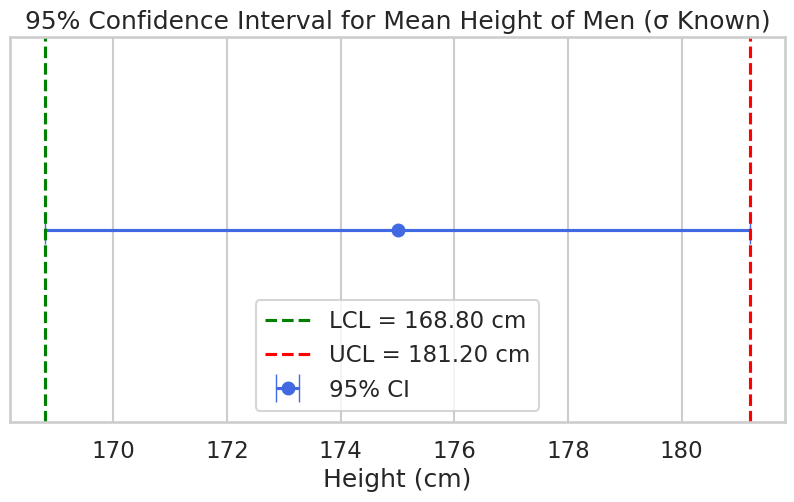

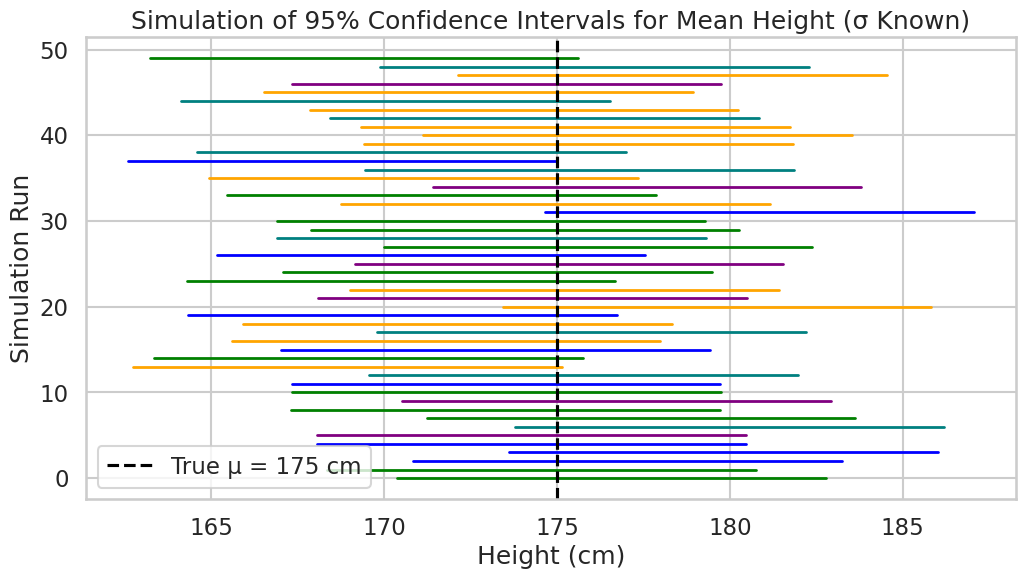

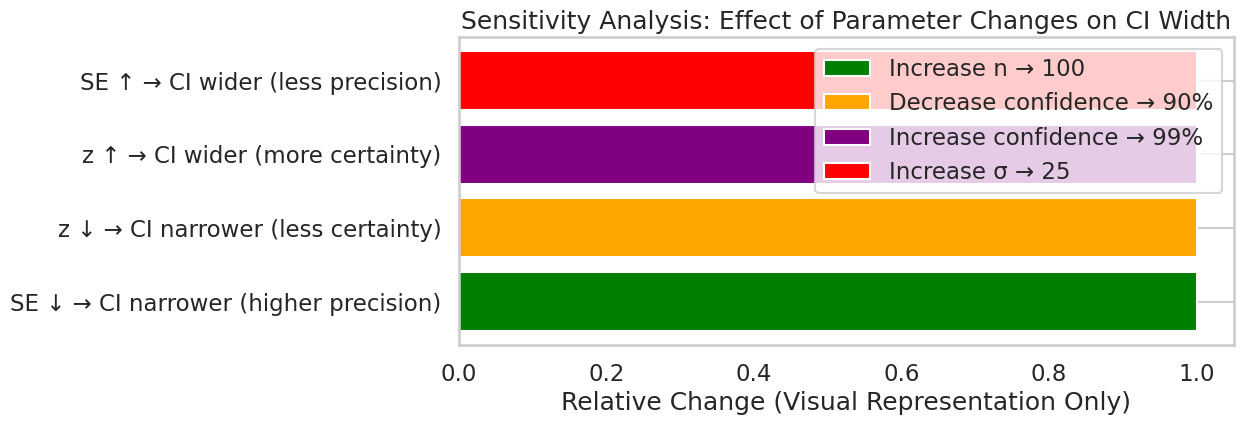


Interpretation:
We are 95% confident that the true mean height of men lies between 168.80 cm and 181.20 cm.
If many samples of 40 men were drawn, approximately 95% of such intervals would include μ = 175 cm.

Sensitivity Analysis:
  • Increase n → SE ↓ → narrower CI (higher precision)
  • Decrease confidence → z ↓ → narrower CI (less certainty)
  • Increase confidence → z ↑ → wider CI (more certainty)
  • Increase σ → SE ↑ → wider CI (less precision)



In [45]:
# ============================================================
# Example: Confidence Interval for Average Height of Men (σ Known)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# ------------------------------------------------------------
# 1️ Problem Setup
# ------------------------------------------------------------
X_bar = 175      # Sample mean (cm)
sigma = 20       # Population standard deviation (cm)
n = 40           # Sample size
confidence = 0.95  # Confidence level
alpha = 1 - confidence

# ------------------------------------------------------------
# 2️ Formula
# CI = X̄ ± z(α/2) * (σ / √n)
# ------------------------------------------------------------

SE = sigma / np.sqrt(n)               # Step 1: Standard Error
z_critical = norm.ppf(1 - alpha/2)    # Step 2: Critical Value
E = z_critical * SE                   # Step 3: Margin of Error
LCL = X_bar - E                       # Step 4: CI Lower Limit
UCL = X_bar + E                       # Step 4: CI Upper Limit

# ------------------------------------------------------------
# 3️ Numeric Results Table
# ------------------------------------------------------------
results_table = pd.DataFrame({
    "Quantity": ["Sample Mean (X̄)", "Population SD (σ)", "Sample Size (n)",
                 "Standard Error (SE)", "Z-critical (zα/2)",
                 "Margin of Error (E)", "Lower CI Limit (LCL)", "Upper CI Limit (UCL)"],
    "Formula / Value": [X_bar, sigma, n, f"{SE:.4f}", f"{z_critical:.2f}", f"{E:.2f}",
                        f"{LCL:.2f}", f"{UCL:.2f}"],
    "Result / Units": ["cm", "cm", "—", "cm", "—", "cm", "cm", "cm"]
})
print("Confidence Interval for the Mean (σ Known):\n")
display(results_table.style.set_caption("Table: CI Calculation Results for Average Male Height")
        .set_table_styles([{'selector': 'caption', 'props': [('font-size', '14pt')]}]))

# ------------------------------------------------------------
# 4️ Visualization — Confidence Interval Plot
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.errorbar(X_bar, 0, xerr=E, fmt='o', color='royalblue', capsize=10, label='95% CI')
plt.axvline(LCL, color='green', linestyle='--', label=f'LCL = {LCL:.2f} cm')
plt.axvline(UCL, color='red', linestyle='--', label=f'UCL = {UCL:.2f} cm')
plt.title('95% Confidence Interval for Mean Height of Men (σ Known)')
plt.xlabel('Height (cm)')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 5️ Simulation — CI Visualization with Sampling
# ------------------------------------------------------------
np.random.seed(42)
num_samples = 200
true_mu = 175

sample_means = np.random.normal(true_mu, sigma / np.sqrt(n), num_samples)
CIs = [(mean - z_critical * SE, mean + z_critical * SE) for mean in sample_means]

# Plot multiple simulated intervals
plt.figure(figsize=(12, 6))
for i, (lower, upper) in enumerate(CIs[:50]):
    # Different colors based on CI relation to true mean
    if lower <= true_mu <= upper:
        color = np.random.choice(['blue', 'green', 'purple', 'orange', 'teal'])
    else:
        color = 'red'
    plt.plot([lower, upper], [i, i], color=color, linewidth=2)

plt.axvline(true_mu, color='black', linestyle='--', label='True μ = 175 cm')
plt.title('Simulation of 95% Confidence Intervals for Mean Height (σ Known)')
plt.xlabel('Height (cm)')
plt.ylabel('Simulation Run')
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 6️ Sensitivity Analysis — Different Parameter Scenarios
# ------------------------------------------------------------
scenarios = pd.DataFrame({
    "Scenario": ["Increase n → 100", "Decrease confidence → 90%", "Increase confidence → 99%", "Increase σ → 25"],
    "Effect on CI": ["SE ↓ → CI narrower (higher precision)",
                     "z ↓ → CI narrower (less certainty)",
                     "z ↑ → CI wider (more certainty)",
                     "SE ↑ → CI wider (less precision)"]
})

# Visual Sensitivity Plot with Color Coding
colors = ['green', 'orange', 'purple', 'red']
plt.figure(figsize=(10, 4))
for i, (label, color) in enumerate(zip(scenarios["Scenario"], colors)):
    plt.barh(i, 1, color=color, label=label)

plt.yticks(range(len(scenarios)), scenarios["Effect on CI"])
plt.title("Sensitivity Analysis: Effect of Parameter Changes on CI Width")
plt.xlabel("Relative Change (Visual Representation Only)")
plt.legend()
plt.grid(axis='x')
plt.show()

# ------------------------------------------------------------
# 7️ Textual Interpretation
# ------------------------------------------------------------
print(f"""
Interpretation:
We are 95% confident that the true mean height of men lies between {LCL:.2f} cm and {UCL:.2f} cm.
If many samples of {n} men were drawn, approximately 95% of such intervals would include μ = {X_bar} cm.

Sensitivity Analysis:
  • Increase n → SE ↓ → narrower CI (higher precision)
  • Decrease confidence → z ↓ → narrower CI (less certainty)
  • Increase confidence → z ↑ → wider CI (more certainty)
  • Increase σ → SE ↑ → wider CI (less precision)
""")
